Employee Attrition


description...

In [1]:
import numpy as np
#Initialize a random number generator
#pass an integer if you want results to be reproducible
rng = np.random.RandomState() 

import matplotlib.pyplot as plt  #plotting library
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
scoring_func = make_scorer(mean_squared_error,greater_is_better=False)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from itertools import combinations
from more_itertools import powerset
import operator

## Load the data set

In [2]:
df = pd.read_csv('Employee-Attrition.csv')

In [3]:
df.count

<bound method DataFrame.count of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educatio

In [4]:
df.dropna(inplace=True)

In [5]:
df.count

<bound method DataFrame.count of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educatio

In [40]:
df["BusinessTravel"]=df["BusinessTravel"].astype('category').cat.codes
df["Department"]=df["Department"].astype('category').cat.codes
df["EducationField"]=df["EducationField"].astype('category').cat.codes
df["Gender"]=df["Gender"].astype('category').cat.codes
df["JobRole"]=df["JobRole"].astype('category').cat.codes
df["MaritalStatus"]=df["MaritalStatus"].astype('category').cat.codes
df["Over18"]=df["Over18"].astype('category').cat.codes
df["OverTime"]=df["OverTime"].astype('category').cat.codes

In [41]:
dataset=df

In [42]:
dataset['MonthlyIncome']

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64

In [43]:
Y=dataset['MonthlyIncome']

In [44]:
Y.describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [45]:
X=df[df.columns[~df.columns.isin(['Attrition','MonthlyIncome'])]]

In [46]:
X.columns.size

33

In [47]:
X.columns.size

33

In [48]:

p=X.columns.size

print(p)




33


In [49]:
y = Y

### Create a training set and a test set





In [50]:
#Split up the big data set into a test set (for final evaluation) and a training set
X_train, X_test, y_train, y_test = train_test_split( X,y, train_size=1400)


Print out (X's are Pandas data frames) the values -- make sure it shuffled

In [51]:
y_train.describe()


count     1400.000000
mean      6447.907143
std       4681.993333
min       1009.000000
25%       2895.000000
50%       4880.500000
75%       8107.250000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [52]:
np.mean(y_train)

6447.907142857143

# Model Fitting

#### Let's first fit using no features (just the intercept $\beta_0$) and all the features ( OLS or Ordinary Least Squares solution)

# Intercept Model

In [53]:
#Train MSE
y_pred = np.ones(y_train.shape)*(np.mean(y_train))
print(y_pred.shape)
print(y_test.shape)
mse_train_just_intercept = mean_squared_error(y_train,y_pred, squared=True)
print(mse_train_just_intercept)

y_pred = np.ones(y_test.shape)*(np.mean(y_train))
mse_test_just_intercept = mean_squared_error(y_test,y_pred, squared=True)

print('\nTraining set MSE using only the intercept: %.2f'%mse_train_just_intercept)
print('\nTest set MSE using only the intercept: %.2f'%mse_test_just_intercept)

print(y_pred)
print(mse_train_just_intercept)

(1400,)
(70,)
21905403.67137755

Training set MSE using only the intercept: 21905403.67

Test set MSE using only the intercept: 27100865.06
[6447.90714286 6447.90714286 6447.90714286 6447.90714286 6447.90714286
 6447.90714286 6447.90714286 6447.90714286 6447.90714286 6447.90714286
 6447.90714286 6447.90714286 6447.90714286 6447.90714286 6447.90714286
 6447.90714286 6447.90714286 6447.90714286 6447.90714286 6447.90714286
 6447.90714286 6447.90714286 6447.90714286 6447.90714286 6447.90714286
 6447.90714286 6447.90714286 6447.90714286 6447.90714286 6447.90714286
 6447.90714286 6447.90714286 6447.90714286 6447.90714286 6447.90714286
 6447.90714286 6447.90714286 6447.90714286 6447.90714286 6447.90714286
 6447.90714286 6447.90714286 6447.90714286 6447.90714286 6447.90714286
 6447.90714286 6447.90714286 6447.90714286 6447.90714286 6447.90714286
 6447.90714286 6447.90714286 6447.90714286 6447.90714286 6447.90714286
 6447.90714286 6447.90714286 6447.90714286 6447.90714286 6447.90714286
 6447.90

# The OLS solution

In [54]:
scaler = StandardScaler()
lin = LinearRegression(normalize=False,fit_intercept=True) 
pipe = make_pipeline(scaler, lin)

pipe.fit(X_train,y_train)
x_pred=pipe.predict(X_test)
# Train MSE
mse_train_OLS = mean_squared_error(y_train, pipe.predict(X_train), squared=True)

# #Test MSE

mse_test_OLS = mean_squared_error(y_test, pipe.predict(X_test), squared=True)

print('\nTraining set MSE using OLS solution: %.2f'%mse_train_OLS)
print('\nTest set MSE using OLS solution: %.2f'%mse_test_OLS)

print(mse_test_OLS)


Training set MSE using OLS solution: 1979916.27

Test set MSE using OLS solution: 2542042.68
2542042.684668856


In [55]:
coef_true=lin.coef_



#### OLS - CV
For reference on the lasso and ridge regression plots, which will be using cross-validation, also calculate the CV hold out MSE using OLS

In [56]:
scaler = StandardScaler()
lin = LinearRegression(normalize=False,fit_intercept=True) 
pipe = make_pipeline(scaler, lin)

pipe.fit(X_train,y_train)

parameters = {}
n_folds=5
gs = GridSearchCV(pipe, parameters, \
                  scoring='neg_mean_squared_error', \
                  cv=n_folds)
gs.fit(X_train,y_train)

scores = -gs.cv_results_['mean_test_score']
scores_std = gs.cv_results_['std_test_score']

mse_train_OLS_CV = scores[0] 
#each entry for different parameter, but no paramters passed, so just first entry

print('\nCVTraining set MSE using OLS solution: %.2f'%mse_train_OLS_CV)


CVTraining set MSE using OLS solution: 2102132.99


#  Lasso

In [57]:
#Cross-validation: pick the number of folds
n_folds = 5
n_alphas = 200 
alphas = np.logspace(-5, 5, n_alphas) #grid search for lambda (aka 'alpha')
parameters = { 'lasso__alpha':alphas}

scaler = StandardScaler()
lasso = Lasso(normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, lasso)
print('\n\nParameters in the pipeline you can set:\n')
print(pipe.get_params().keys()) #reports input names can set (look for the hyper-parameters)
gs = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
gs.fit(X_train,y_train)
#pre_y=gs.predict(X_test)
print('\nDone fitting')



Parameters in the pipeline you can set:

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'lasso', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'lasso__alpha', 'lasso__copy_X', 'lasso__fit_intercept', 'lasso__max_iter', 'lasso__normalize', 'lasso__positive', 'lasso__precompute', 'lasso__random_state', 'lasso__selection', 'lasso__tol', 'lasso__warm_start'])

Done fitting


In [58]:
t= mean_squared_error(y_test, gs.predict(X_test), squared=True)



In [59]:
t

2461694.5228137746

In [60]:
gs.score(X_test, y_test)

-2461694.5228137746

In [61]:
gs.score(X_train, y_train)

-2030725.0807358592

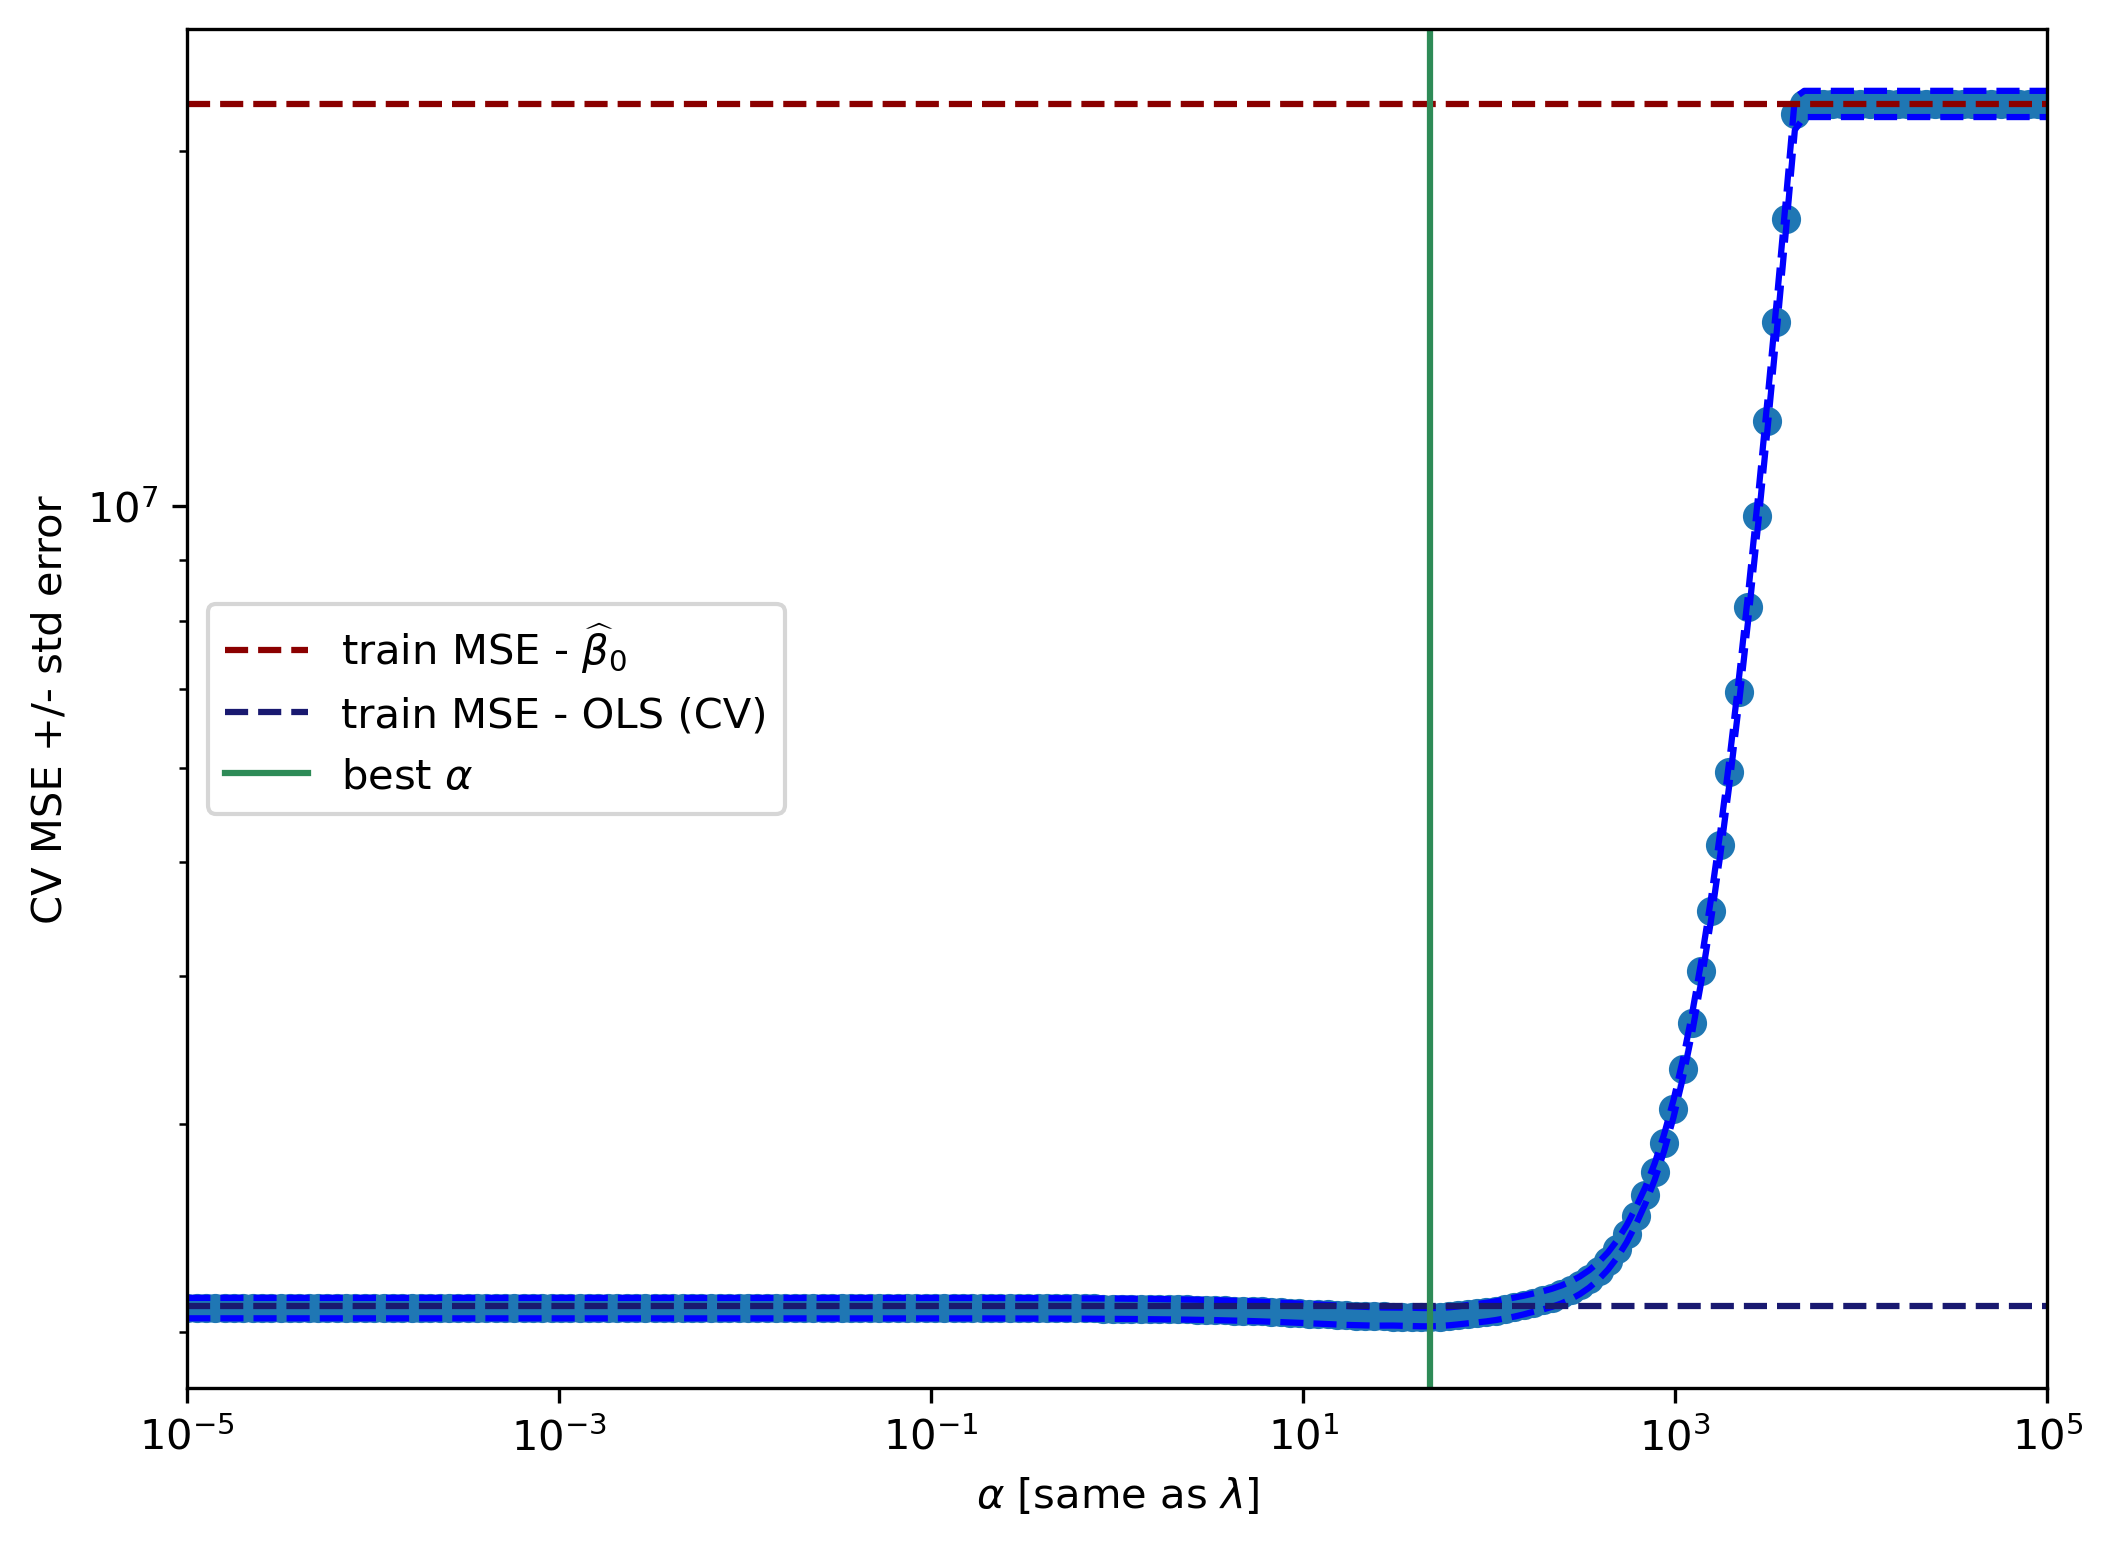

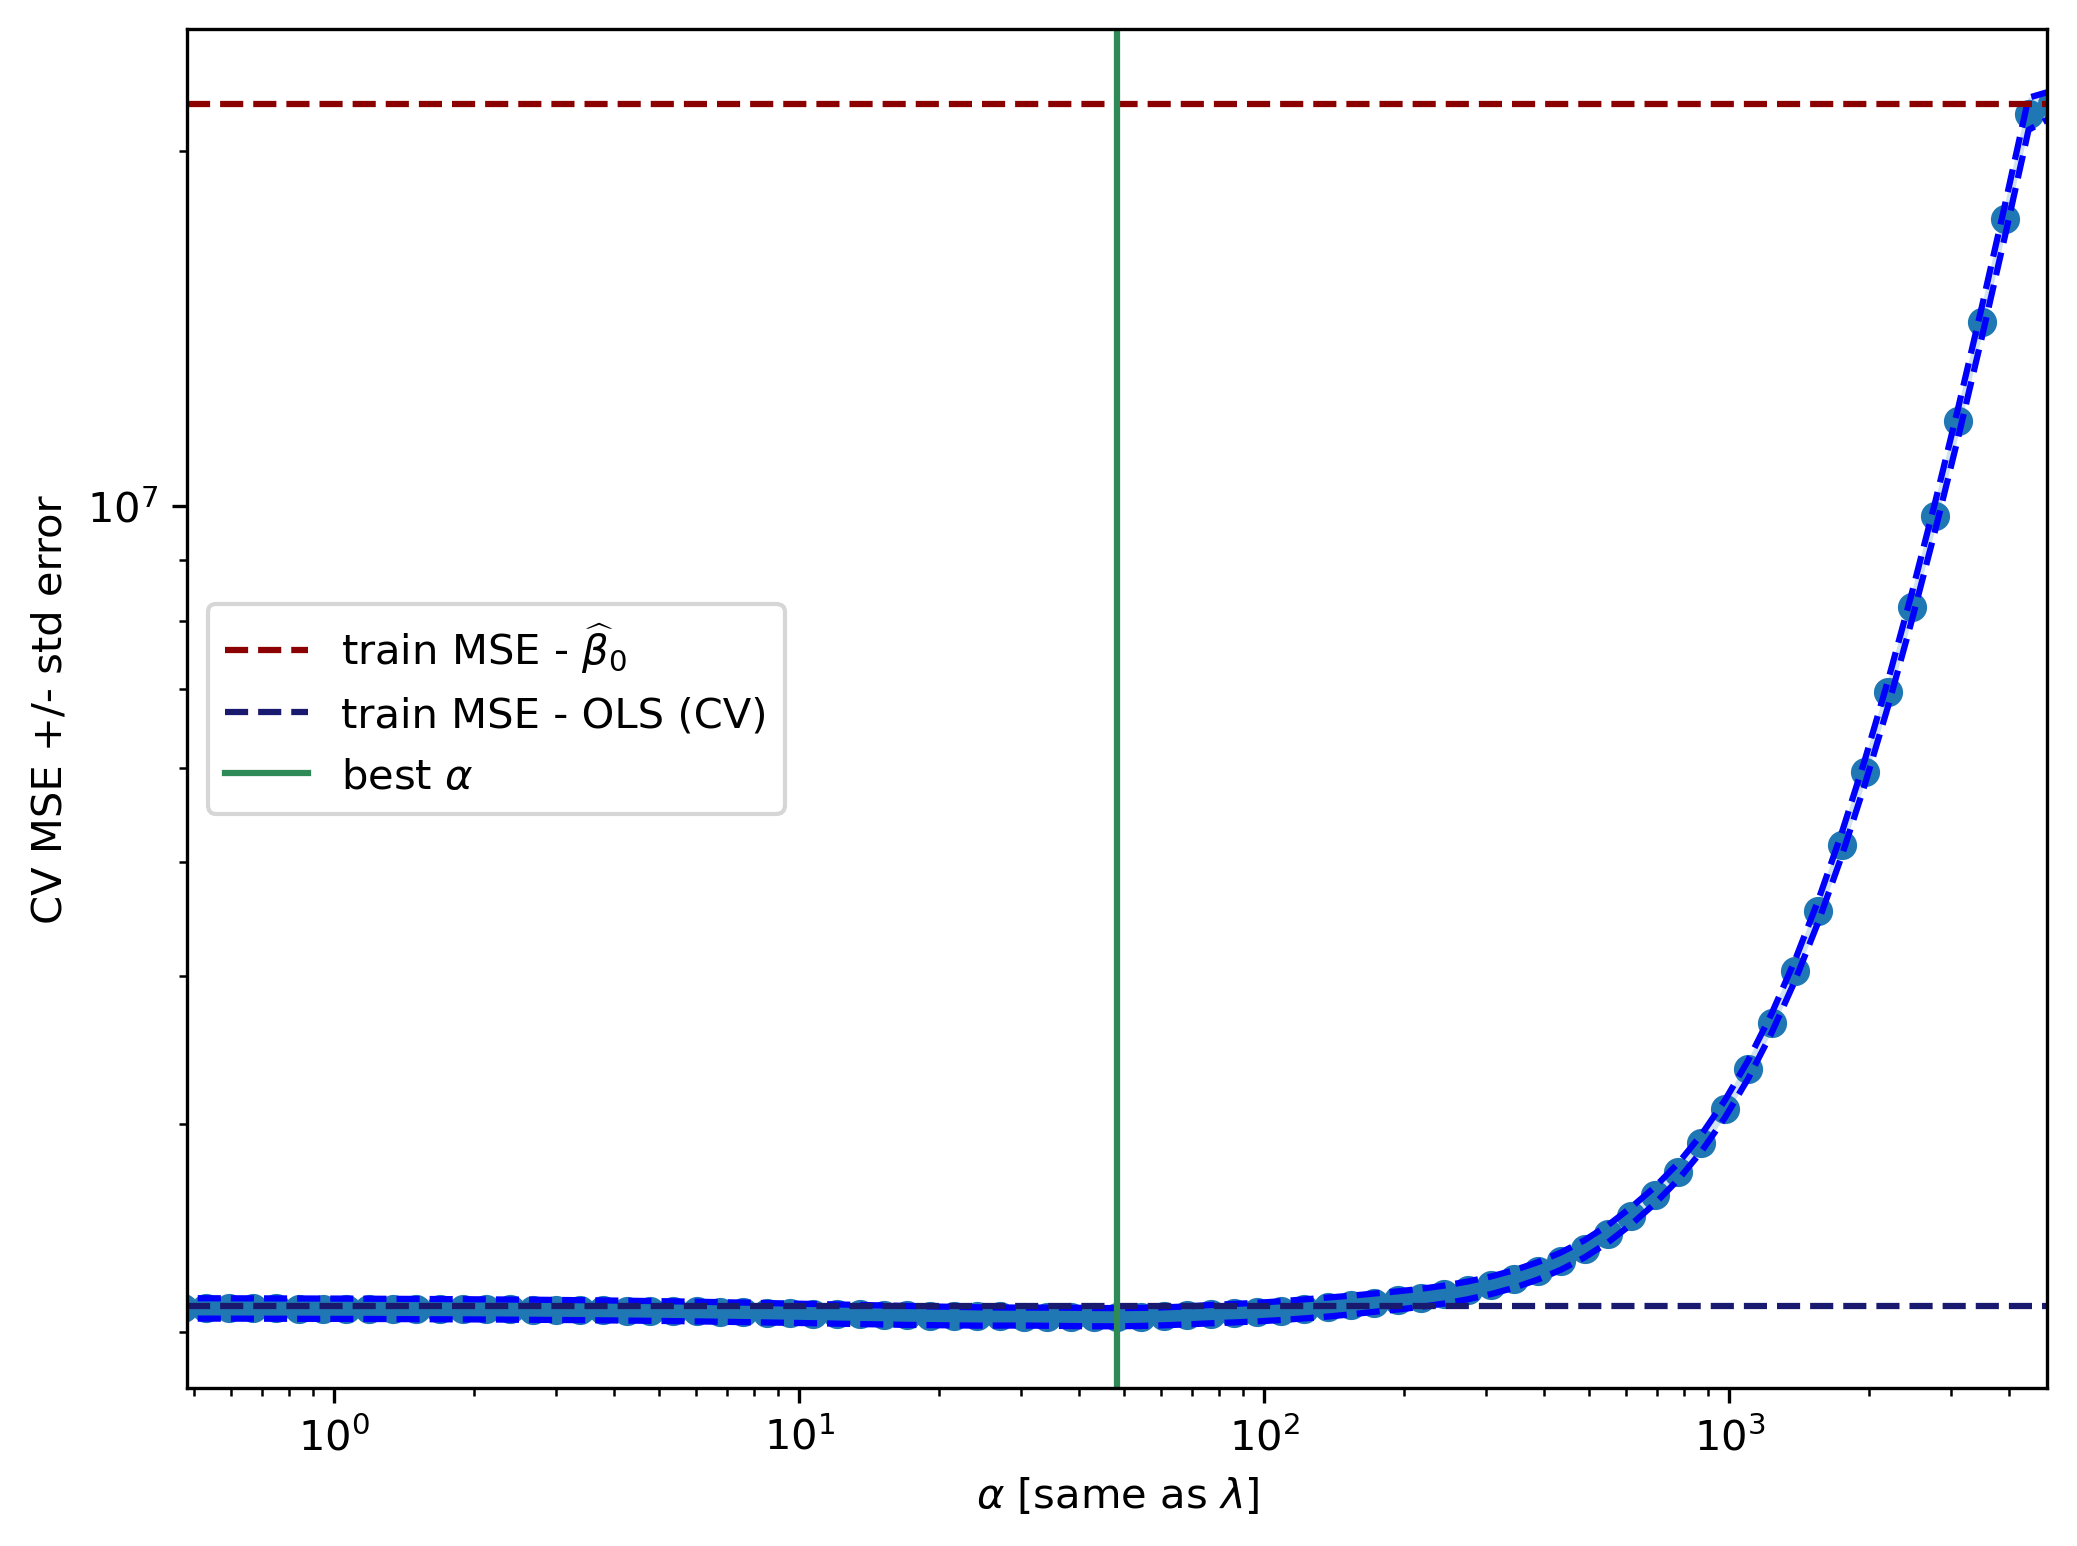

In [62]:
#For the gridcv, it maximizes the negative MSE; scores are negative of what we want
scores = -gs.cv_results_['mean_test_score']
scores_std = gs.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.loglog(alphas, scores,'o')

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.loglog(alphas, scores + std_error, 'b--')
plt.loglog(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV MSE +/- std error')
plt.xlabel(r'$\alpha$ [same as $\lambda$]')


#plot baseline fits for training set
#just intercept
plt.axhline(mse_train_just_intercept, linestyle='--',\
            color='darkred', \
            label=r'train MSE - $\widehat{\beta}_0$')

#true coefficients
#plt.axhline(mse_train_using_coef_true, linestyle='--', color='black',label='train MSE - true coef')

#OLS solution (no penalty-- all features)
plt.axhline(mse_train_OLS_CV, linestyle='--', \
            color='midnightblue',label='train MSE - OLS (CV)')

#Mark the value of the best $\alpha$
plt.axvline(alphas[scores.argmin()], linestyle='-', \
            color='seagreen',label=r'best $\alpha$')
plt.xlim([alphas[0], alphas[-1]])
#plt.ylim(mse_train_using_coef_true*.5, 2*mse_train_just_intercept)
plt.legend()




#zoom in - same figure
plt.figure().set_size_inches(8, 6)
plt.loglog(alphas, scores,'o')

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.loglog(alphas, scores + std_error, 'b--')
plt.loglog(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV MSE +/- std error')
plt.xlabel(r'$\alpha$ [same as $\lambda$]')


#plot baseline fits for training set
#just intercept
plt.axhline(mse_train_just_intercept, linestyle='--',\
            color='darkred', \
            label=r'train MSE - $\widehat{\beta}_0$')

#true coefficients
#plt.axhline(mse_train_using_coef_true, linestyle='--', \
   #         color='black',label='train MSE - true coef')

#OLS solution (no penalty-- all features)
plt.axhline(mse_train_OLS_CV, linestyle='--', \
            color='midnightblue',label='train MSE - OLS (CV)')

#Mark the value of the best $\alpha$
plt.axvline(alphas[scores.argmin()], linestyle='-', \
            color='seagreen',label=r'best $\alpha$')

plt.xlim(alphas[scores.argmin()]/100,alphas[scores.argmin()]*100)
#plt.ylim(mse_train_using_coef_true*.5, 2*scores[0])
plt.legend()

Text(0, 0.5, 'Coefficients')

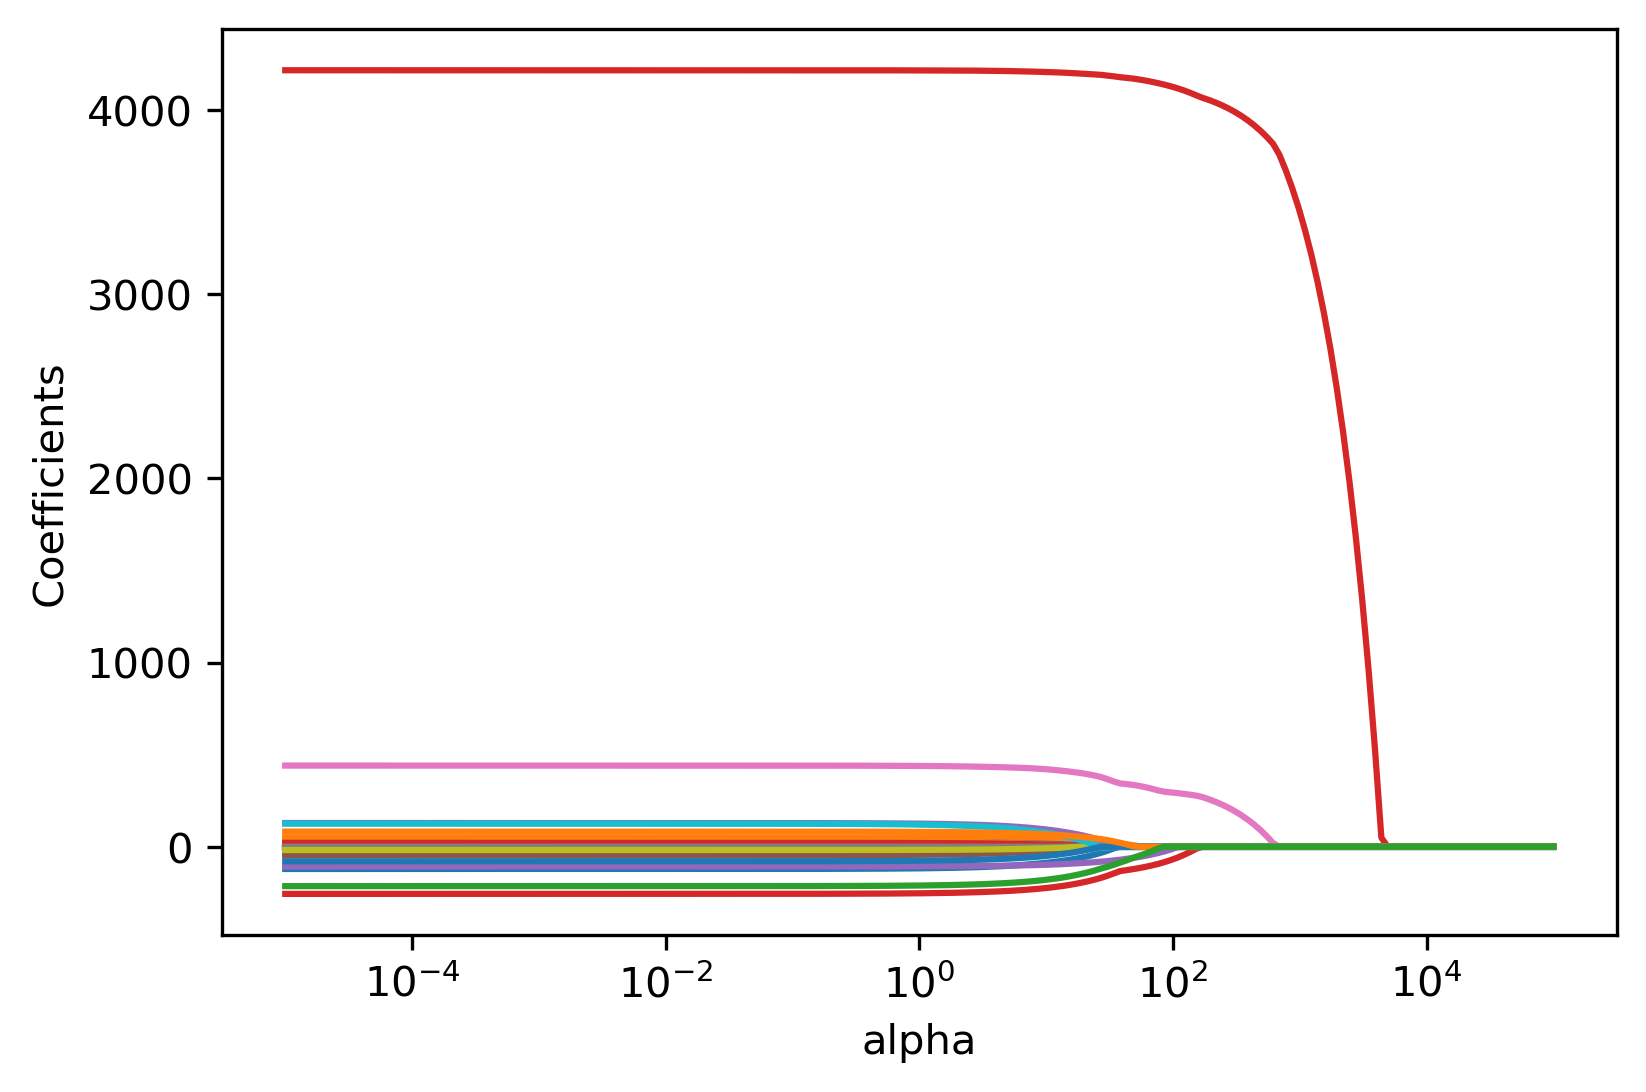

In [63]:
n_alphas = 200 
alphas = np.logspace(-5, 5, n_alphas) #grid search for lambda (aka 'alpha')

scaler = StandardScaler()
lasso = Lasso(normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, lasso)
coefs = []
all_coef=[]
# print(pipe.get_params().keys()) #reports input names can set (look for the hyper-parameters)
parameters = {'lasso__alpha':alphas}
# model = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
# model.fit(X_train,y_train)
for a in alphas:
    pipe.set_params(lasso__alpha=a)
    pipe.fit(X_train, y_train)
    coefs.append(pipe.named_steps['lasso'].coef_)
    all_coef.append({"alpha":a, "coef":pipe.named_steps['lasso'].coef_})

plt.figure()
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')

In [64]:
for a in all_coef:
    print(a["coef"])

[-1.20654884e+02  5.07830694e+01  2.14123122e+01 -2.55925704e+02
 -1.07221935e+02 -1.44716253e+01  1.03294755e+01  0.00000000e+00
  2.10842041e+01 -3.33997572e+01  2.02108481e+01  3.68341926e+01
 -9.48763944e+00  4.21510311e+03  1.28765284e+02 -2.68738178e+01
 -3.83473921e+01 -9.20771911e+00  1.14189392e+01  0.00000000e+00
  2.51830767e+01  4.07135420e+01 -1.78262607e+01  2.11253230e+01
  0.00000000e+00 -4.64405441e+01  4.40623356e+02  1.37715835e-01
 -1.81183841e+01  1.25153880e+02 -7.90483896e+01  8.22830475e+01
 -2.13982342e+02]
[-1.20654880e+02  5.07830683e+01  2.14123110e+01 -2.55925700e+02
 -1.07221934e+02 -1.44716242e+01  1.03294743e+01  0.00000000e+00
  2.10842025e+01 -3.33997559e+01  2.02108470e+01  3.68341912e+01
 -9.48763824e+00  4.21510310e+03  1.28765279e+02 -2.68738167e+01
 -3.83473885e+01 -9.20771810e+00  1.14189373e+01  0.00000000e+00
  2.51830754e+01  4.07135358e+01 -1.78262549e+01  2.11253219e+01
  0.00000000e+00 -4.64405407e+01  4.40623353e+02  1.37714425e-01
 -1.811

In [65]:
best_alpha_lasso = gs.best_params_['lasso__alpha']
print(best_alpha_lasso)

48.241087041653735


In [66]:
scaler = StandardScaler()
lasso = Lasso(alpha=best_alpha_lasso,normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, lasso)
pipe.fit(X_train, y_train)

best_coef_lasso = pipe.named_steps['lasso'].coef_

In [67]:
mean_squared_error(y_test, pipe.predict(X_test), squared=True)

2461694.5228137746

In [68]:
print('\nCoefficients    [true]  [lasso]')
for i in range(p):
    print('   Feature %2i:   %5.2f   %.2f'%(i,\
                    coef_true[i],best_coef_lasso[i]))


Coefficients    [true]  [lasso]
   Feature  0:   -120.65   -0.00
   Feature  1:   50.78   8.45
   Feature  2:   21.41   0.00
   Feature  3:   -255.93   -121.89
   Feature  4:   -107.22   -60.94
   Feature  5:   -14.47   -0.00
   Feature  6:   10.33   0.00
   Feature  7:   -0.00   0.00
   Feature  8:   21.08   0.00
   Feature  9:   -33.40   -0.00
   Feature 10:   20.21   0.00
   Feature 11:   36.83   0.00
   Feature 12:   -9.49   -0.00
   Feature 13:   4215.10   4170.11
   Feature 14:   128.77   0.00
   Feature 15:   -26.87   -0.00
   Feature 16:   -38.35   -0.00
   Feature 17:   -9.21   -0.00
   Feature 18:   11.42   0.00
   Feature 19:    0.00   0.00
   Feature 20:   25.18   0.00
   Feature 21:   40.71   0.00
   Feature 22:   -17.83   0.00
   Feature 23:   21.13   0.00
   Feature 24:    0.00   0.00
   Feature 25:   -46.44   -0.00
   Feature 26:   440.62   335.87
   Feature 27:    0.14   -0.00
   Feature 28:   -18.12   -0.00
   Feature 29:   125.15   0.00
   Feature 30:   -79.05   -0.

# Ridge -- model fit

In [69]:
#Cross-validation: pick the number of folds
n_folds = 5
#Specify the lambdas we will check.  
n_alphas = 200 
alphas = np.logspace(-10, 10, n_alphas) #grid search for lambda (aka 'alpha')
#Create a scikit-learn 'pipeline' for standardizing the data (scale so unit variance)
#  Then use scikit-learn 'gridsearchCV' with that pipeline in lieu 
#    of having separate for loops.
#  
parameters = { 'ridge__alpha':alphas}
scaler = StandardScaler()
ridge = Ridge(normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, ridge)
print('\n\nParameters in the pipeline you can set:\n')
print(pipe.get_params().keys()) #reports input names can set (look for the hyper-parameters)
#Now do the grid search - one call to fit() tells it to run the 
# pipeline in k-fold CV, in each split fitting for all lambdas
gs = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
gs.fit(X_train,y_train)

#print('\nDone fitting')



Parameters in the pipeline you can set:

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'ridge', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'ridge__alpha', 'ridge__copy_X', 'ridge__fit_intercept', 'ridge__max_iter', 'ridge__normalize', 'ridge__random_state', 'ridge__solver', 'ridge__tol'])


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.00000000e-10, 1.26038293e-10, 1.58856513e-10, 2.00220037e-10,
       2.52353917e-10, 3.18062569e-10, 4.00880633e-10, 5.05263107e-10,
       6.36824994e-10, 8.02643352e-10, 1.01163798e-09, 1.27505124e-09,
       1.60705282e-09, 2.02550194e-09, 2.5529...
       4.88025158e+07, 6.15098579e+07, 7.75259749e+07, 9.77124154e+07,
       1.23155060e+08, 1.55222536e+08, 1.95639834e+08, 2.46581108e+08,
       3.10786619e+08, 3.91710149e+08, 4.93704785e+08, 6.22257084e+08,
       7.84282206e+08, 9.88495905e+08, 1.24588336e+09, 1.57029012e+09,
       1.97916687e+09, 2.49450814e+09, 3.14403547e+09, 3.96268864e+09,
       4.99450512e+09, 6.29498899e+09, 7.93409667e+09, 1.00000000e+10])},
             scoring='neg_mean_squared_error')

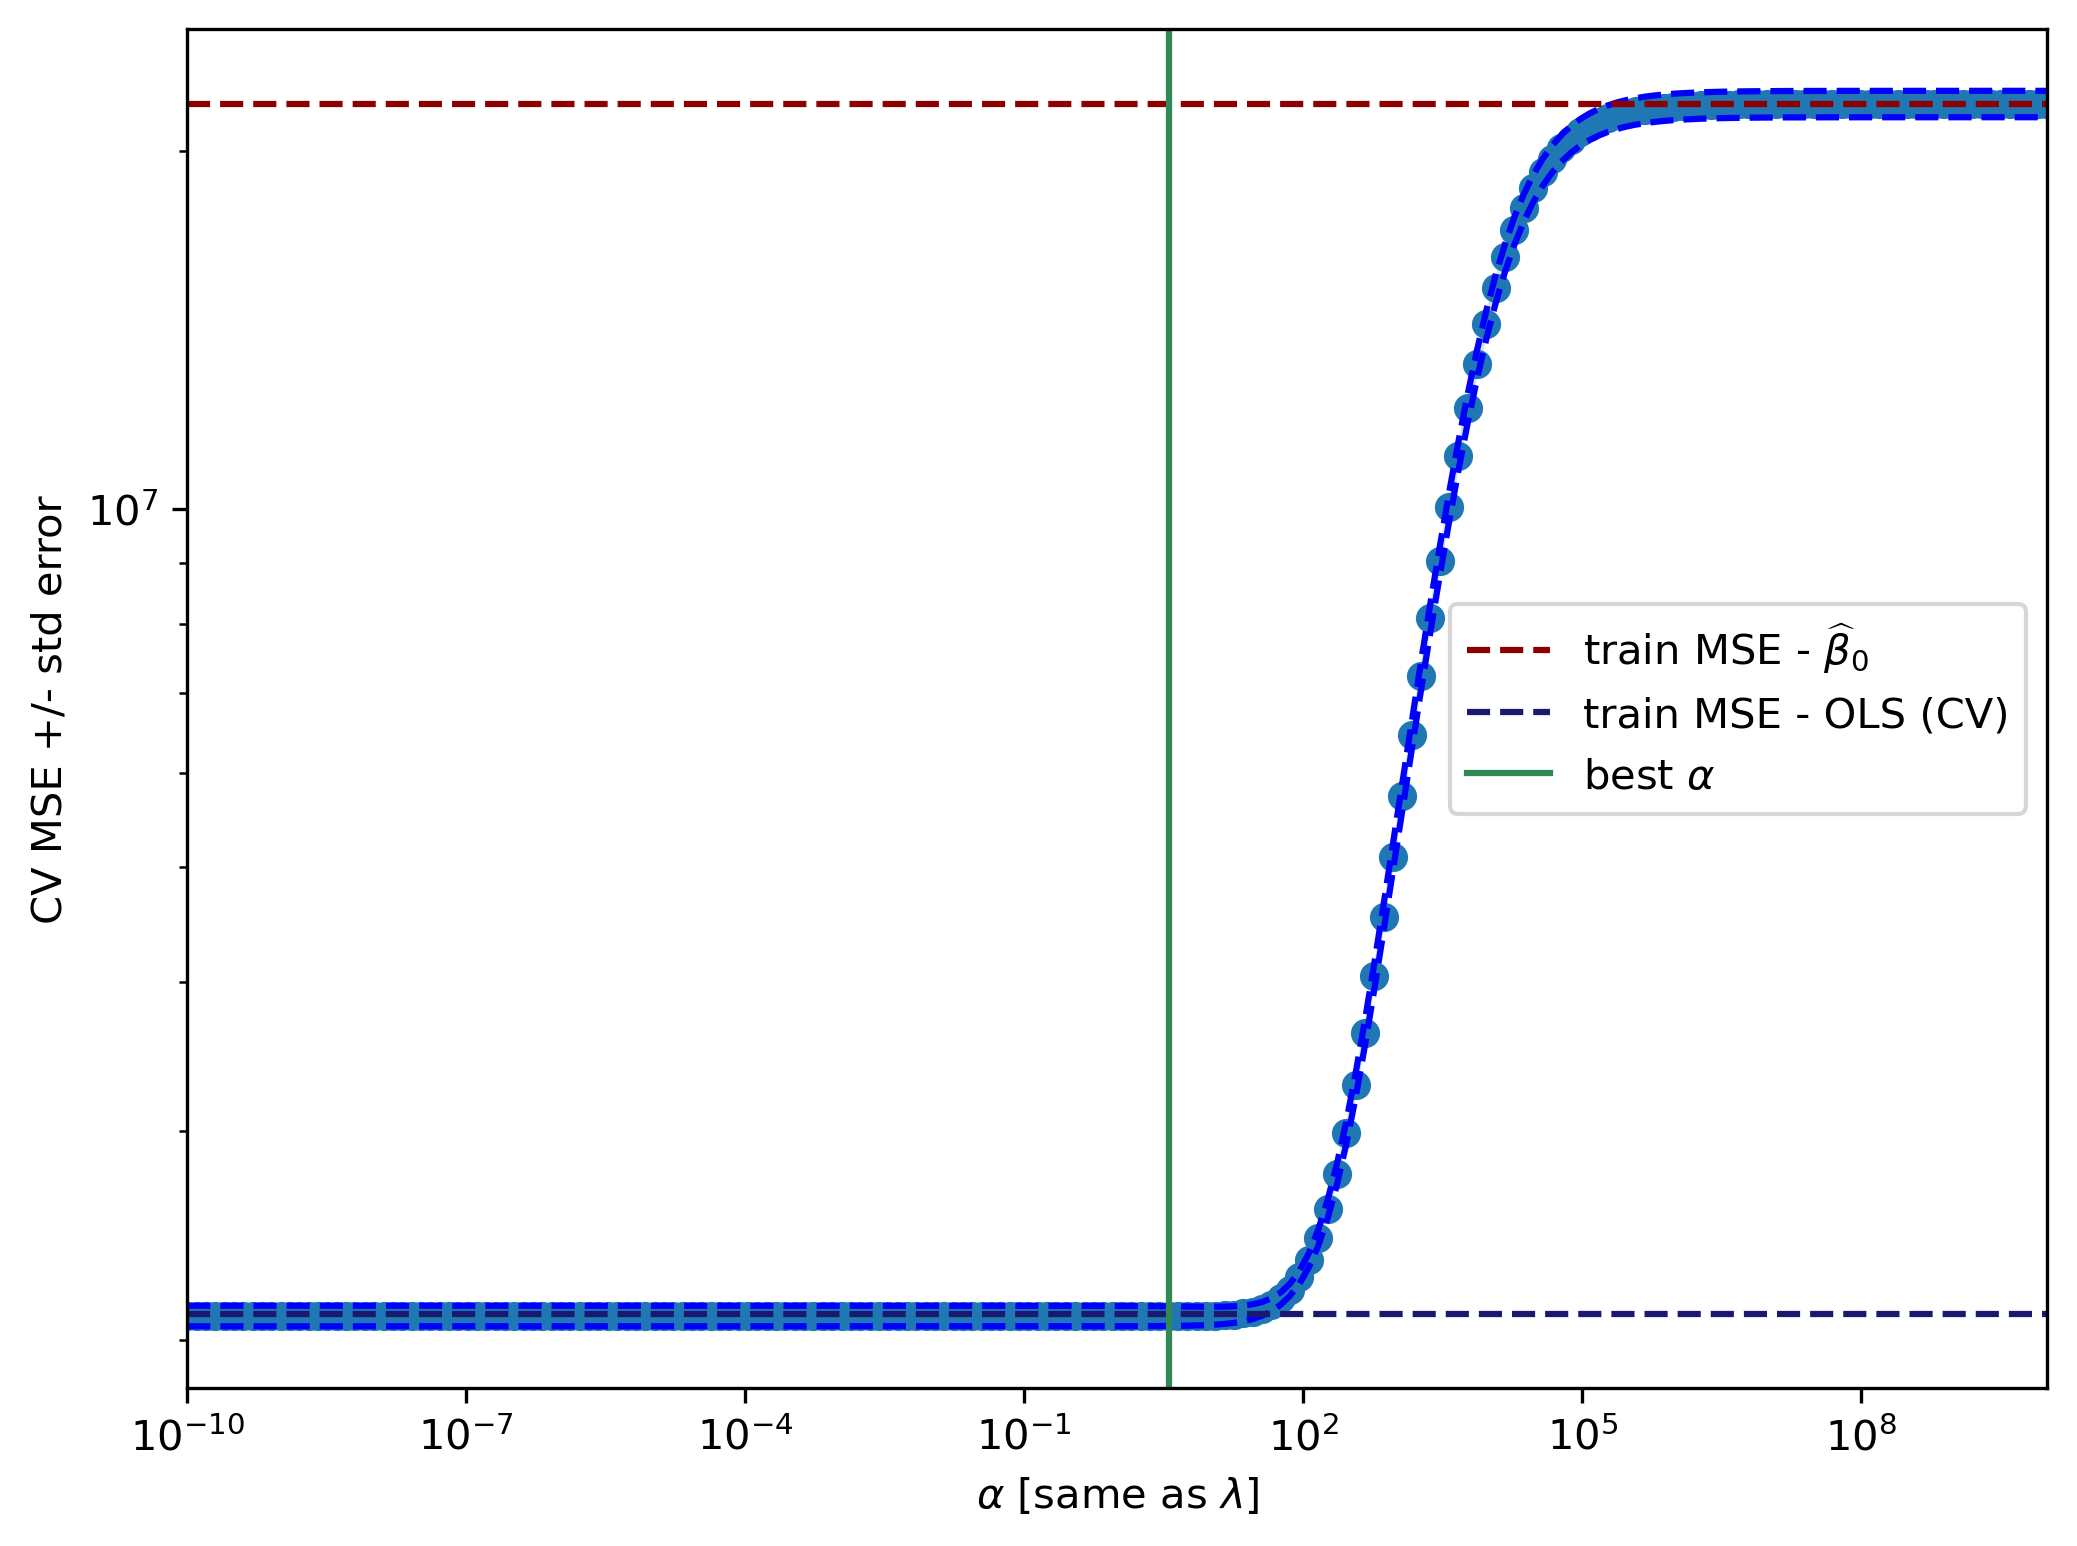

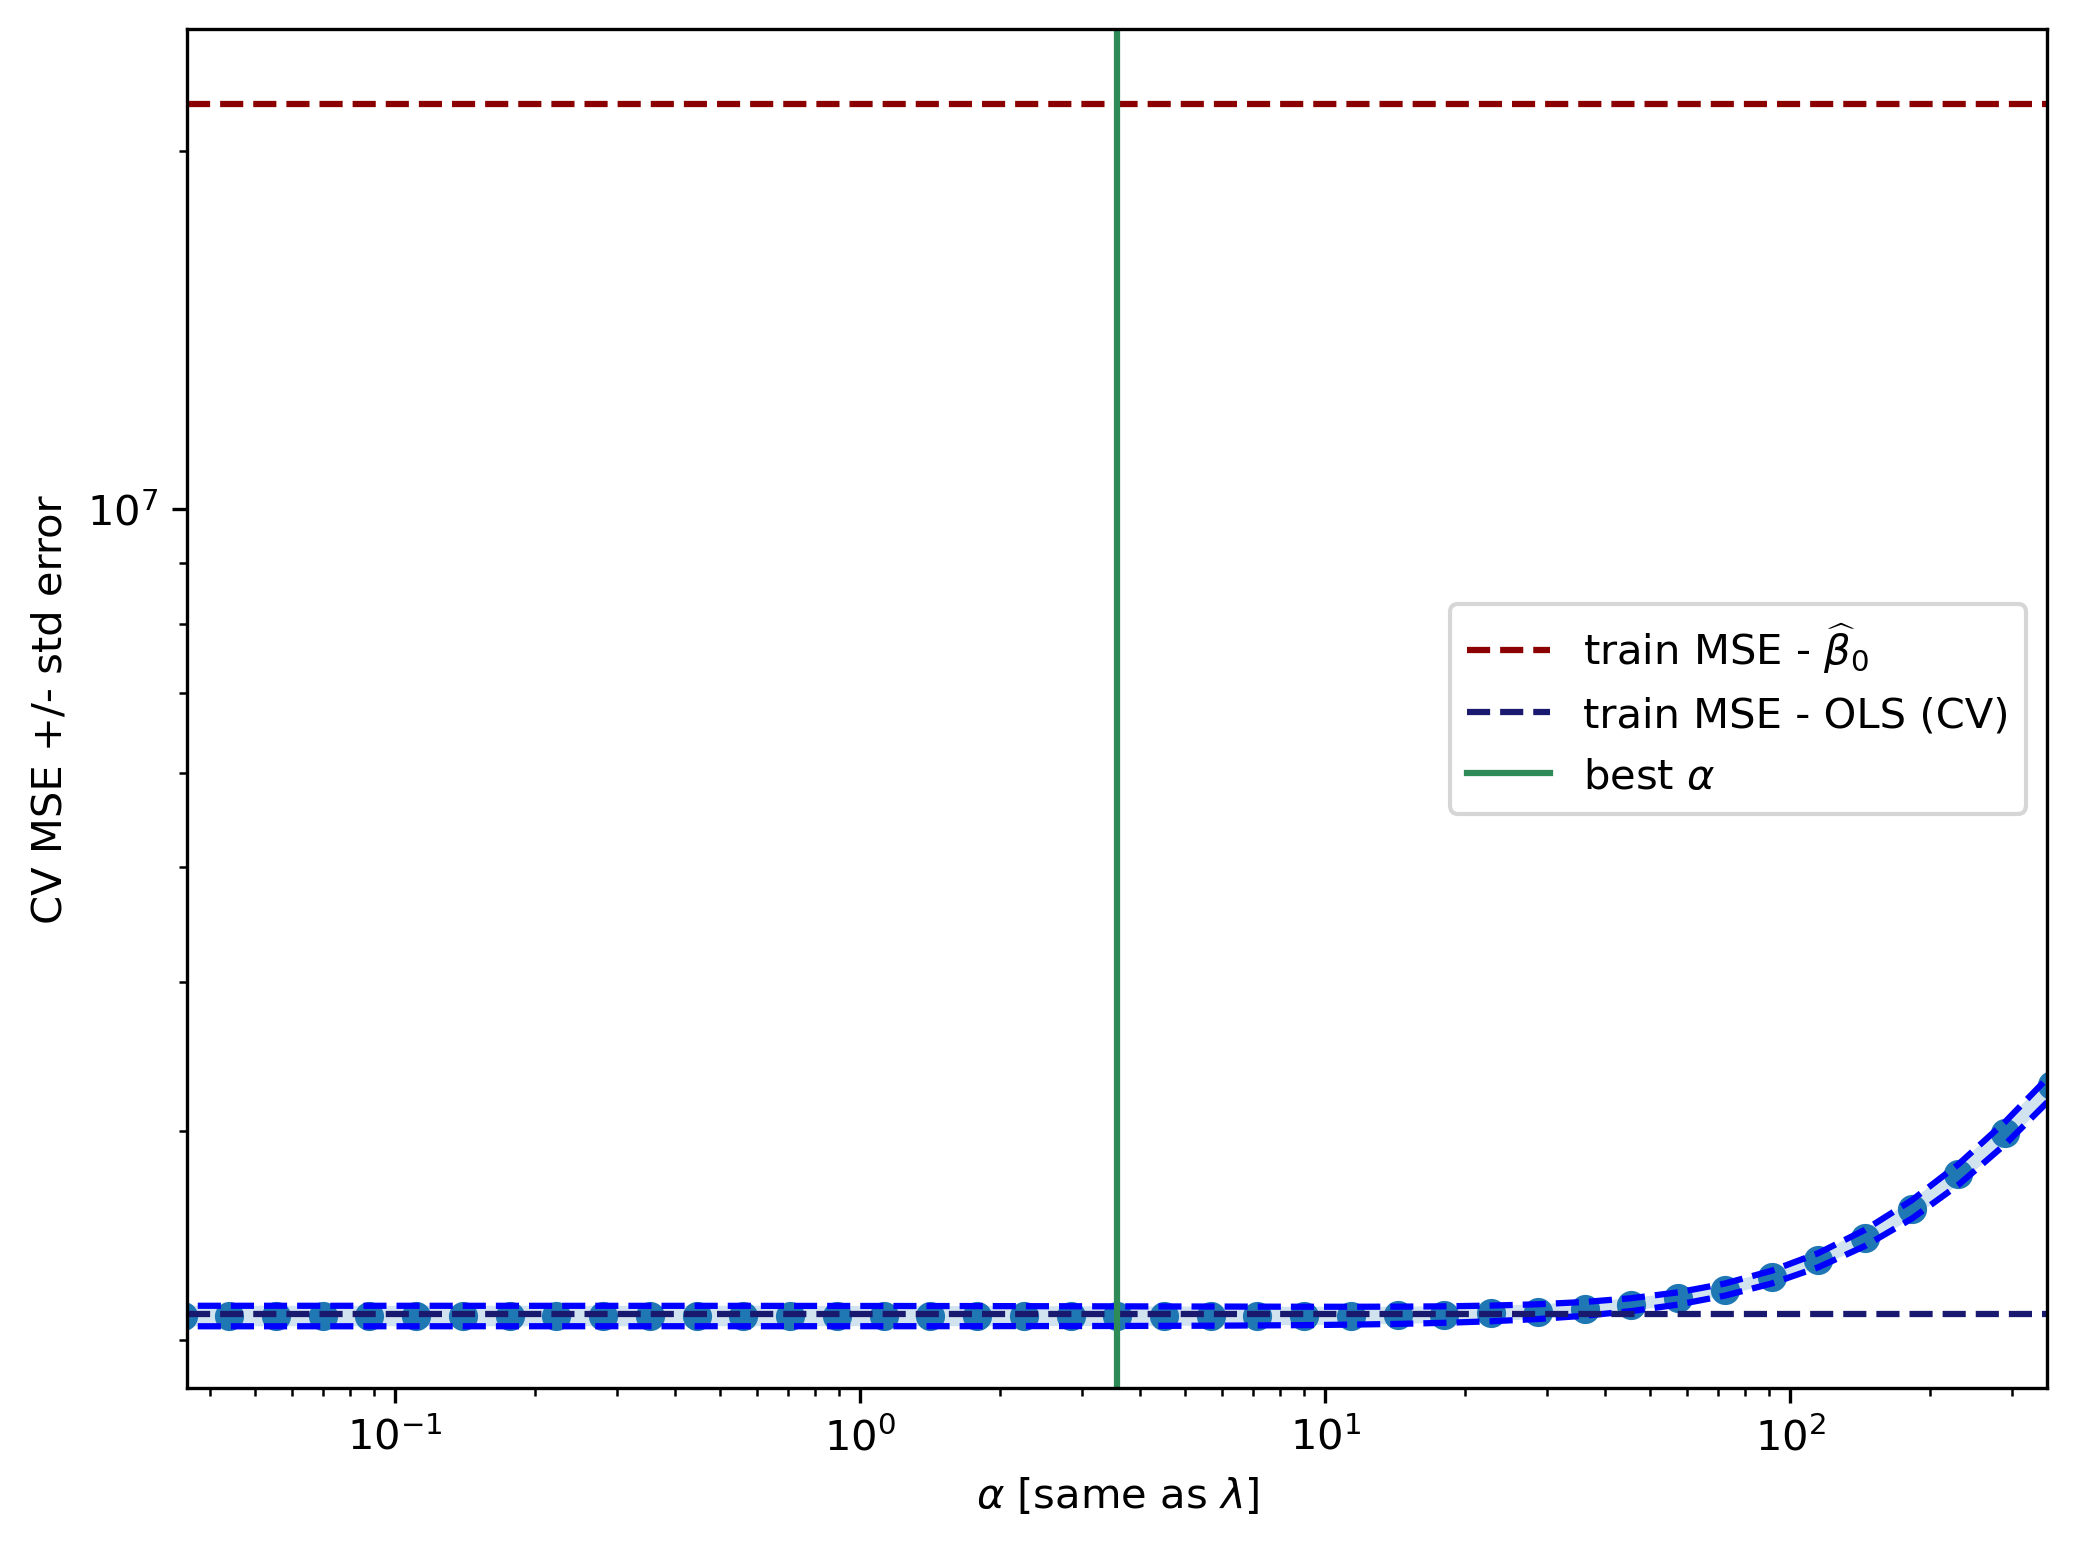

In [70]:
#For the gridcv, it maximizes the negative MSE; scores are negative of what we want
scores = -gs.cv_results_['mean_test_score']
scores_std = gs.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.loglog(alphas, scores,'o')

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.loglog(alphas, scores + std_error, 'b--')
plt.loglog(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV MSE +/- std error')
plt.xlabel(r'$\alpha$ [same as $\lambda$]')


#plot baseline fits for training set
#just intercept
plt.axhline(mse_train_just_intercept, linestyle='--',\
            color='darkred', \
            label=r'train MSE - $\widehat{\beta}_0$')

# #true coefficients
# plt.axhline(mse_train_using_coef_true, linestyle='--', \
#             color='black',label='train MSE - true coef')

#OLS solution (no penalty-- all features)
plt.axhline(mse_train_OLS_CV, linestyle='--', \
            color='midnightblue',label='train MSE - OLS (CV)')

#Mark the value of the best $\alpha$
plt.axvline(alphas[scores.argmin()], linestyle='-', \
            color='seagreen',label=r'best $\alpha$')
plt.xlim([alphas[0], alphas[-1]])
# plt.ylim(mse_train_using_coef_true*.5, 2*mse_train_just_intercept)
plt.legend()




#zoom in - same figure
plt.figure().set_size_inches(8, 6)
plt.loglog(alphas, scores,'o')

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.loglog(alphas, scores + std_error, 'b--')
plt.loglog(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV MSE +/- std error')
plt.xlabel(r'$\alpha$ [same as $\lambda$]')


#plot baseline fits for training set
#just intercept
plt.axhline(mse_train_just_intercept, linestyle='--',\
            color='darkred', \
            label=r'train MSE - $\widehat{\beta}_0$')

#true coefficients
# plt.axhline(mse_train_using_coef_true, linestyle='--', \
#             color='black',label='train MSE - true coef')

#OLS solution (no penalty-- all features)
plt.axhline(mse_train_OLS_CV, linestyle='--', \
            color='midnightblue',label='train MSE - OLS (CV)')

#Mark the value of the best $\alpha$
plt.axvline(alphas[scores.argmin()], linestyle='-', \
            color='seagreen',label=r'best $\alpha$')

plt.xlim(alphas[scores.argmin()]/100,alphas[scores.argmin()]*100)
# plt.ylim(mse_train_using_coef_true*.5, 2*scores[0])
plt.legend()

Text(0, 0.5, 'Coefficients')

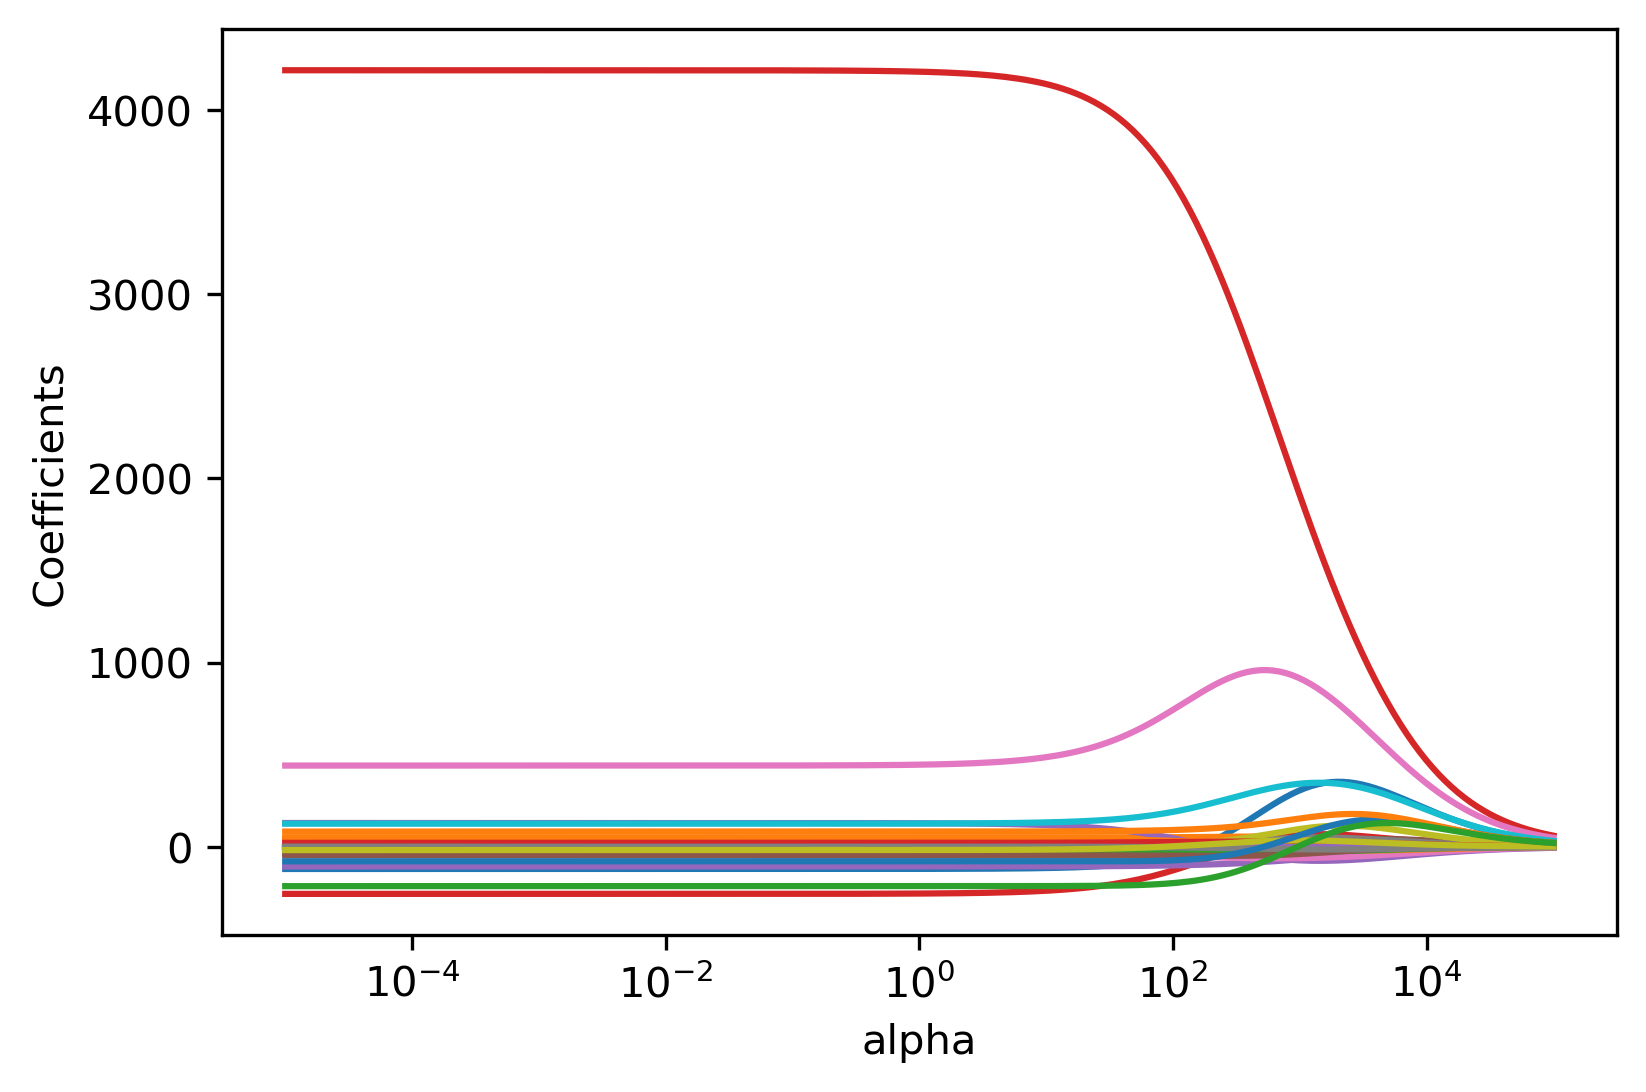

In [71]:
n_alphas = 200 
alphas = np.logspace(-5, 5, n_alphas) #grid search for lambda (aka 'alpha')

scaler = StandardScaler()
ridge = Ridge(normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, ridge)
coefs = []
co_ridge=[]
# print(pipe.get_params().keys()) #reports input names can set (look for the hyper-parameters)
parameters = {'ridge__alpha':alphas}
# model = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
# model.fit(X_train,y_train)
for a in alphas:
    pipe.set_params(ridge__alpha=a)
    pipe.fit(X_train, y_train)
    coefs.append(pipe.named_steps['ridge'].coef_)
    # print(pipe.named_steps['ridge'].coef_)
    # print("new alpha")
    co_ridge.append({'alpha':a, 'coef':pipe.named_steps['ridge'].coef_})

plt.figure()
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')


In [72]:
best_alpha_ridge = gs.best_params_['ridge__alpha']
print(best_alpha_ridge)

3.57078596490047


In [73]:
scaler = StandardScaler()
ridge = Ridge(alpha=best_alpha_ridge,normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, ridge)
pipe.fit(X_train, y_train)

best_coef_ridge = pipe.named_steps['ridge'].coef_



In [74]:
mean_squared_error(y_test, pipe.predict(X_test))

2550538.992497925

In [75]:
print('\nCoefficients    [true]  [lasso]')
for i in range(p):
    print('   Feature %2i:   %5.2f   %.2f'%(i,\
                    coef_true[i],best_coef_ridge[i]))


Coefficients    [true]  [lasso]
   Feature  0:   -120.65   -118.96
   Feature  1:   50.78   50.76
   Feature  2:   21.41   21.20
   Feature  3:   -255.93   -249.67
   Feature  4:   -107.22   -107.00
   Feature  5:   -14.47   -14.54
   Feature  6:   10.33   9.67
   Feature  7:   -0.00   0.00
   Feature  8:   21.08   21.16
   Feature  9:   -33.40   -33.23
   Feature 10:   20.21   20.01
   Feature 11:   36.83   35.97
   Feature 12:   -9.49   -9.53
   Feature 13:   4215.10   4187.84
   Feature 14:   128.77   124.67
   Feature 15:   -26.87   -26.63
   Feature 16:   -38.35   -39.04
   Feature 17:   -9.21   -8.49
   Feature 18:   11.42   11.10
   Feature 19:    0.00   0.00
   Feature 20:   25.18   25.06
   Feature 21:   40.71   40.49
   Feature 22:   -17.83   -18.42
   Feature 23:   21.13   21.39
   Feature 24:    0.00   0.00
   Feature 25:   -46.44   -46.56
   Feature 26:   440.62   457.44
   Feature 27:    0.14   0.01
   Feature 28:   -18.12   -17.16
   Feature 29:   125.15   127.61
   Fea

# Exhaustive search (best subset search)

In [ ]:
p = X_train.shape[1] #the number of columns
list_features = range(0,p)

print(list_features)

for subset in powerset(list_features):
    print(subset)

range(0, 33)
()
(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)
(20,)
(21,)
(22,)
(23,)
(24,)
(25,)
(26,)
(27,)
(28,)
(29,)
(30,)
(31,)
(32,)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(0, 21)
(0, 22)
(0, 23)
(0, 24)
(0, 25)
(0, 26)
(0, 27)
(0, 28)
(0, 29)
(0, 30)
(0, 31)
(0, 32)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(1, 14)
(1, 15)
(1, 16)
(1, 17)
(1, 18)
(1, 19)
(1, 20)
(1, 21)
(1, 22)
(1, 23)
(1, 24)
(1, 25)
(1, 26)
(1, 27)
(1, 28)
(1, 29)
(1, 30)
(1, 31)
(1, 32)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(2, 11)
(2, 12)
(2, 13)
(2, 14)
(2, 15)
(2, 16)
(2, 17)
(2, 18)
(2, 19)
(2, 20)
(2, 21)
(2, 22)
(2, 23)
(2, 24)
(2, 25)
(2, 26)
(2, 27)
(2, 28)
(2, 29)
(2, 30)
(2, 31)
(2, 32)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(3, 11)
(3, 12)
(3, 13)
(3

KeyboardInterrupt: 

In [ ]:
numbers=[i for i in range(0,p-2)] 

print(numbers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [ ]:
model = make_pipeline(StandardScaler(), LinearRegression())

#keep a dictionary, with key as the cardinality and value as 
#  a dictionary with values 'features' (list) and 'trainMSE' (float)
#  initialize with empty set (intercept), calculated above
subsets = {}
subsets[0] = {'features':(), 'aicPenalty':0 , 'trainMSE':mse_test_just_intercept, 'testMSE': mse_test_just_intercept,\
     'cardinality': (), 'AIC': mse_test_just_intercept, 'BIC':mse_test_just_intercept}  

numbers=numbers
features=[]

#subset...
for subset in powerset(list_features):
       
    if len(subset)==0:
        continue # for the empty set, skip to next subset
    
    #first just use columns corresponding to this feature 
    cols = list(i for i in subset) #adjust indexing

    X_train_subset = X_train.iloc[:,cols]
    X_test_subset=X_test.iloc[:,cols]
    model.fit(X_train_subset,y_train)
    mse_train = mean_squared_error(y_train, model.predict(X_train_subset))

    mse_test_subset=mean_squared_error(y_test, model.predict(X_test_subset))

    #update if this is the best seen of this cardinality
    k = len(subset)
    
    if k not in list(subsets.keys()):
        #add as currently best
        subsets[k] = {'features':subset, 'trainMSE':mse_train, 'testMSE':mse_test_subset, 'cardinality' : len(subset) }
    else:
        if subsets[k]['trainMSE']>mse_train:
            #add as currently best
            subsets[k] = {'features':subset, 'trainMSE':mse_train , 'testMSE':mse_test_subset, 'cardinality': len(subset) }
    
    print('\n'+'Features: '+str(subset)+' '+  ' MSE: '+str(mse_train))
       

NameError: name 'numbers' is not defined

In [ ]:
subsets[8]['trainMSE']


KeyError: 8

In [ ]:
trainMSE_vals = []#save for plotting
AIC_vals = [] 
BIC_vals = []
AIC_pen=[]
for k in range(p+1):
    subset = subsets[k]['features']
    mse_train = subsets[k]['trainMSE']
    mse_test = subsets[k]['testMSE']
    noise_var_estimate = subsets[p]['trainMSE'] #use the model with all predictors
    
    n_train_samples = X_train.shape[0]
    
    AIC_penalty = 2*k*noise_var_estimate/n_train_samples
    subsets[k]['AIC'] = mse_train+AIC_penalty
    subsets[k]['aicPenalty'] = AIC_penalty
    
    BIC_penalty = np.log(n_train_samples)*k*noise_var_estimate/n_train_samples
    subsets[k]['BIC'] = mse_test+BIC_penalty
    # subsets[k]['aicPenalty']
    # print("MSE: "+ str(mse_train))
    # print("AIC: "+ str(AIC_penalty))
    # print("BIC: "+ str(BIC_penalty))
    trainMSE_vals.append(subsets[k]['trainMSE'])
    AIC_vals.append(subsets[k]['AIC'])
    BIC_vals.append(subsets[k]['BIC'])
    AIC_pen.append(subsets[k]['aicPenalty'])


In [ ]:
for i in range(p+1):
    print("Feature:"+ str(subsets[i]["features"])+", training MSE + AIC: "+ str(subsets[i]["AIC"])+", test MSE: "+ str(subsets[i]["testMSE"]) )

# Forward search 

In [76]:
#forward...

model = make_pipeline(StandardScaler(), LinearRegression())

#keep a dictionary, with key as the cardinality and value as 
#  a dictionary with values 'features' (list) and 'trainMSE' (float)
#  initialize with empty set (intercept), calculated above
subsets_fw = {}
subsets_fw[0] = {'cardinality':0, 'features':(), 'trainMSE':mse_train_just_intercept, 'testMSE':mse_train_just_intercept, \
              'AIC':mse_train_just_intercept, 'BIC':mse_train_just_intercept}  

selected_features = []
counter = 0
for i in range(0,p):
       
    # if len(subset)==0:
        # continue # for the empty set, skip to next subset
    cols = selected_features
    k = -1
    mse = 99999999
    #mse_test=99999999
    for j in range(0,p):
        if j not in cols:
            cols.append(j)
        else:
            continue
        
        X_train_subset = X_train.iloc[:,cols]
        X_test_subset=X_test.iloc[:, cols]
        # print('X_train_subset shape: ' + str(X_train_subset.shape))
        model.fit(X_train_subset,y_train)
        mse_train = mean_squared_error(y_train, model.predict(X_train_subset))
        mse_test_fw = mean_squared_error(y_test, model.predict(X_test_subset))
        print('cols: ' + str(cols) + '\ttrainMSE: ' + str(mse_train)+ '\ttestMSE: ' + str(mse_test_fw))
        
        if mse_train < mse:
            k = j
            mse = mse_train
            mse_test=mse_test_fw

        cols = selected_features

        cols.remove(j)
    
    selected_features.append(k)
    counter = counter + 1
    print(selected_features)
    subsets_fw[len(selected_features)] = {'cardinality': len(selected_features), 'features': str(selected_features), 'trainMSE': mse, 'testMSE':mse_test_fw}
    

cols: [0]	trainMSE: 16524108.957220249	testMSE: 19440223.603981037
cols: [1]	trainMSE: 21865798.996391177	testMSE: 27373908.163260058
cols: [2]	trainMSE: 21903387.750250157	testMSE: 27113377.593409754
cols: [3]	trainMSE: 21834416.56458935	testMSE: 27214147.581916284
cols: [4]	trainMSE: 21888864.799853947	testMSE: 27349313.35905296
cols: [5]	trainMSE: 21684722.781970892	testMSE: 27337867.3784923
cols: [6]	trainMSE: 21870320.352756727	testMSE: 27017892.187376764
cols: [7]	trainMSE: 21905403.67137755	testMSE: 27100865.056989793
cols: [8]	trainMSE: 21903637.924516946	testMSE: 27050567.709707037
cols: [9]	trainMSE: 21904598.38831125	testMSE: 27169184.247304082
cols: [10]	trainMSE: 21871014.251062755	testMSE: 27344666.127029203
cols: [11]	trainMSE: 21902279.802945133	testMSE: 27054079.446286436
cols: [12]	trainMSE: 21900567.152132172	testMSE: 27089394.56745293
cols: [13]	trainMSE: 2129767.6369011994	testMSE: 2492435.143293672
cols: [14]	trainMSE: 21710628.767376397	testMSE: 26889699.50429887

In [77]:
#forward...
trainMSE_vals_fw = []#save for plotting
AIC_vals_fw = [] 
BIC_vals_fw = []

for k in range(p+1):
    subset = subsets_fw[k]['features']
    mse_train = subsets_fw[k]['trainMSE']
    mse_test = subsets_fw[k]['testMSE']
    noise_var_estimate = subsets_fw[p]['trainMSE'] #use the model with all predictors
    
    n_train_samples = X_train.shape[0]
    
    AIC_penalty = 2*k*noise_var_estimate/n_train_samples
    subsets_fw[k]['AIC'] = mse_train+AIC_penalty
    BIC_penalty = np.log(n_train_samples)*k*noise_var_estimate/n_train_samples
    subsets_fw[k]['BIC'] = mse_test+BIC_penalty
    print("MSE: "+ str(mse_train)+ "Penalty: "+str(AIC_penalty) + "Cardinality: "+str(k))
    # print("AIC: "+ str(AIC_penalty))
    # print("BIC: "+ str(BIC_penalty))
    trainMSE_vals_fw.append(subsets_fw[k]['trainMSE'])
    AIC_vals_fw.append(subsets_fw[k]['AIC'])
    BIC_vals_fw.append(subsets_fw[k]['BIC'])
# print(BIC_vals_fw)
# print("test")
# print(AIC_vals_fw)
#print(trainMSE_vals_fw+BIC_vals_fw)

MSE: 21905403.67137755Penalty: 0.0Cardinality: 0
MSE: 2129767.6369011994Penalty: 2828.451818082159Cardinality: 1
MSE: 2077733.5856530974Penalty: 5656.903636164318Cardinality: 2
MSE: 2047288.8083491684Penalty: 8485.355454246477Cardinality: 3
MSE: 2030031.1702698176Penalty: 11313.807272328637Cardinality: 4
MSE: 2018457.6683333847Penalty: 14142.259090410796Cardinality: 5
MSE: 2009330.971631708Penalty: 16970.710908492954Cardinality: 6
MSE: 2000869.7798357222Penalty: 19799.162726575116Cardinality: 7
MSE: 1995600.3299579613Penalty: 22627.614544657274Cardinality: 8
MSE: 1993160.1399310303Penalty: 25456.066362739435Cardinality: 9
MSE: 1991236.347173969Penalty: 28284.518180821593Cardinality: 10
MSE: 1988442.4088167443Penalty: 31112.969998903754Cardinality: 11
MSE: 1986919.8387304735Penalty: 33941.42181698591Cardinality: 12
MSE: 1986010.8894793116Penalty: 36769.87363506807Cardinality: 13
MSE: 1985281.3787956133Penalty: 39598.32545315023Cardinality: 14
MSE: 1984601.7509895046Penalty: 42426.777271

In [78]:
subsets_fw

{0: {'cardinality': 0,
  'features': (),
  'trainMSE': 21905403.67137755,
  'testMSE': 21905403.67137755,
  'AIC': 21905403.67137755,
  'BIC': 21905403.67137755},
 1: {'cardinality': 1,
  'features': '[13]',
  'trainMSE': 2129767.6369011994,
  'testMSE': 21976791.28988993,
  'AIC': 2132596.0887192814,
  'BIC': 21987036.264133487},
 2: {'cardinality': 2,
  'features': '[13, 26]',
  'trainMSE': 2077733.5856530974,
  'testMSE': 2492697.191778269,
  'AIC': 2083390.4892892616,
  'BIC': 2513187.140265378},
 3: {'cardinality': 3,
  'features': '[13, 26, 3]',
  'trainMSE': 2047288.8083491684,
  'testMSE': 2498157.8623752017,
  'AIC': 2055774.163803415,
  'BIC': 2528892.7851058654},
 4: {'cardinality': 4,
  'features': '[13, 26, 3, 32]',
  'trainMSE': 2030031.1702698176,
  'testMSE': 2467111.8076340132,
  'AIC': 2041344.977542146,
  'BIC': 2508091.7046082313},
 5: {'cardinality': 5,
  'features': '[13, 26, 3, 32, 4]',
  'trainMSE': 2018457.6683333847,
  'testMSE': 2515361.6543783927,
  'AIC': 2

In [79]:
for i in range(p+1):
    print("Feature:"+ str(subsets_fw[i]["features"])+", training MSE + AIC: "+ str(subsets_fw[i]["AIC"])+", test MSE: "+ str(subsets_fw[i]["testMSE"]) )

Feature:(), training MSE + AIC: 21905403.67137755, test MSE: 21905403.67137755
Feature:[13], training MSE + AIC: 2132596.0887192814, test MSE: 21976791.28988993
Feature:[13, 26], training MSE + AIC: 2083390.4892892616, test MSE: 2492697.191778269
Feature:[13, 26, 3], training MSE + AIC: 2055774.163803415, test MSE: 2498157.8623752017
Feature:[13, 26, 3, 32], training MSE + AIC: 2041344.977542146, test MSE: 2467111.8076340132
Feature:[13, 26, 3, 32, 4], training MSE + AIC: 2032599.9274237955, test MSE: 2515361.6543783927
Feature:[13, 26, 3, 32, 4, 0], training MSE + AIC: 2026301.682540201, test MSE: 2546583.9857109087
Feature:[13, 26, 3, 32, 4, 0, 14], training MSE + AIC: 2020668.9425622972, test MSE: 2607168.1082628975
Feature:[13, 26, 3, 32, 4, 0, 14, 31], training MSE + AIC: 2018227.9445026186, test MSE: 2517033.1991442917
Feature:[13, 26, 3, 32, 4, 0, 14, 31, 1], training MSE + AIC: 2018616.2062937699, test MSE: 2525798.023514958
Feature:[13, 26, 3, 32, 4, 0, 14, 31, 1, 29], trainin

In [80]:
for i in range(p+1):
    print("Feature:"+ str(subsets_fw[i]["features"])+", AIC: "+ str(subsets_fw[i]["AIC"]) )


Feature:(), AIC: 21905403.67137755
Feature:[13], AIC: 2132596.0887192814
Feature:[13, 26], AIC: 2083390.4892892616
Feature:[13, 26, 3], AIC: 2055774.163803415
Feature:[13, 26, 3, 32], AIC: 2041344.977542146
Feature:[13, 26, 3, 32, 4], AIC: 2032599.9274237955
Feature:[13, 26, 3, 32, 4, 0], AIC: 2026301.682540201
Feature:[13, 26, 3, 32, 4, 0, 14], AIC: 2020668.9425622972
Feature:[13, 26, 3, 32, 4, 0, 14, 31], AIC: 2018227.9445026186
Feature:[13, 26, 3, 32, 4, 0, 14, 31, 1], AIC: 2018616.2062937699
Feature:[13, 26, 3, 32, 4, 0, 14, 31, 1, 29], AIC: 2019520.8653547906
Feature:[13, 26, 3, 32, 4, 0, 14, 31, 1, 29, 30], AIC: 2019555.3788156481
Feature:[13, 26, 3, 32, 4, 0, 14, 31, 1, 29, 30, 11], AIC: 2020861.2605474594
Feature:[13, 26, 3, 32, 4, 0, 14, 31, 1, 29, 30, 11, 9], AIC: 2022780.7631143797
Feature:[13, 26, 3, 32, 4, 0, 14, 31, 1, 29, 30, 11, 9, 15], AIC: 2024879.7042487636
Feature:[13, 26, 3, 32, 4, 0, 14, 31, 1, 29, 30, 11, 9, 15, 20], AIC: 2027028.528260737
Feature:[13, 26, 3, 32,

# Backward search

In [81]:

model = make_pipeline(StandardScaler(), LinearRegression())

#keep a dictionary, with key as the cardinality and value as 
#  a dictionary with values 'features' (list) and 'trainMSE' (float)
#  initialize with empty set (intercept), calculated above

subsets_bw = {}
  

selected_features = tuple(i for i in range(0,p))
discarded_features = ()
counter = 0
for i in range(0,p):
       
    # if len(subset)==0:
        # continue # for the empty set, skip to next subset
    cols = selected_features
    k = -1
    mse = 99999999
    mse_test=9999999
    selected_set = ()
    for j in range(-1,p):
        if j in list(discarded_features):
            continue
        
        # cols = cols + (j,)
        cols = list(x for x in cols if x != j)
        # print(cols)
        
        if len(cols)==0:
            continue
        
        X_train_subset = X_train.iloc[:,cols]
        X_test_subset=X_test.iloc[:, cols]
        # print('X_train_subset shape: ' + str(X_train_subset.shape))
        
        model.fit(X_train_subset,y_train)
        mse_train = mean_squared_error(y_train, model.predict(X_train_subset))
        mse_test_bw = mean_squared_error(y_test, model.predict(X_test_subset))
        print('cols: ' + str(cols) + '\ttrainMSE: ' + str(mse_train) + '\ttestMSE: ' + str(mse_test_bw))

        if mse_train < mse:
            k = j
            selected_set = cols
            mse = mse_train
            mse_test=mse_test_bw

        cols = selected_features
    

    subsets_bw[counter] = {'cardinality': len(selected_set), 'features': selected_set, 'trainMSE': mse, 'testMSE': mse_test}
    selected_features = tuple(x for x in cols if x != k)

    discarded_features = discarded_features + (k,)
    counter = counter + 1
    
    print('cardinality: ' + str(len(selected_set))+ ' features: ' + str(selected_set)+' trainMSE: '+str(mse))
    subsets_bw[counter] = {'cardinality':0, 'features':(), 'trainMSE':mse_train_just_intercept, 'testMSE': mse_train_just_intercept, 'AIC':mse_train_just_intercept, 'BIC':mse_train_just_intercept}

print('counter: ' + str(len(subsets_bw)))     

cols: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]	trainMSE: 1979916.272657512	testMSE: 2542042.684668856
cols: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]	trainMSE: 1987072.2999698916	testMSE: 2491551.265929184
cols: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]	trainMSE: 1982468.5866000447	testMSE: 2570007.5660146214
cols: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]	trainMSE: 1980361.9886424146	testMSE: 2542100.9352213787
cols: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]	trainMSE: 2014096.9639971221	testMSE: 2697261.514679905
cols: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 

In [82]:
for i in range(p+1):
    print("Feature:"+ str(subsets_bw[i]["features"])+", Test MSE: "+ str(subsets_bw[i]["trainMSE"]) )

Feature:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], Test MSE: 1979916.272657512
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], Test MSE: 1979916.2726575122
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], Test MSE: 1979916.2726575122
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32], Test MSE: 1979916.2726575122
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 28, 29, 30, 31, 32], Test MSE: 1979916.2911743936
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25, 26, 28, 29, 30, 31, 32], Test MSE: 1979999.430411146
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25, 26, 28,

In [83]:
#backward...
trainMSE_vals_bw = []#save for plotting
AIC_vals_bw = [] 
BIC_vals_bw = []

for k in range(p+1):
    subset = subsets_bw[k]['features']
    mse_train = subsets_bw[k]['trainMSE']
    mse_test = subsets_bw[k]['testMSE']
    noise_var_estimate = subsets_bw[0]['trainMSE'] #use the model with all predictors
    
    n_train_samples = X_train.shape[0]
    
    AIC_penalty = 2*k*noise_var_estimate/n_train_samples
    
    subsets_bw[k]['AIC'] = mse_train+AIC_penalty
    BIC_penalty = np.log(n_train_samples)*k*noise_var_estimate/n_train_samples
    subsets_bw[k]['BIC'] = mse_test+BIC_penalty
    # print("MSE: "+ str(mse_train))
    # print("AIC: "+ str(AIC_penalty))
    # print("BIC: "+ str(BIC_penalty))

    trainMSE_vals_bw.append(subsets_bw[k]['trainMSE'])
    AIC_vals_bw.append(subsets_bw[k]['AIC'])
    BIC_vals_bw.append(subsets_bw[k]['BIC'])

#print(AIC_vals_bw)

In [84]:
for i in range(p+1):
    print("Feature:"+ str(subsets_bw[i]["features"])+", training MSE + AIC: "+ str(subsets_bw[i]["AIC"])+", test MSE: "+ str(subsets_bw[i]["testMSE"]) )

Feature:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], training MSE + AIC: 1979916.272657512, test MSE: 2542042.684668856
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], training MSE + AIC: 1982744.7244755945, test MSE: 2542042.684668856
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], training MSE + AIC: 1985573.1762936765, test MSE: 2542042.6846688553
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32], training MSE + AIC: 1988401.6281117587, test MSE: 2542042.684668856
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 28, 29, 30, 31, 32], training MSE + AIC: 1991230.0984467221, test MSE: 2542008.0716363117
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9,

In [85]:
#print(AIC_vals)
print(AIC_vals_fw)
print(AIC_vals_bw )



[21905403.67137755, 2132596.0887192814, 2083390.4892892616, 2055774.163803415, 2041344.977542146, 2032599.9274237955, 2026301.682540201, 2020668.9425622972, 2018227.9445026186, 2018616.2062937699, 2019520.8653547906, 2019555.3788156481, 2020861.2605474594, 2022780.7631143797, 2024879.7042487636, 2027028.528260737, 2029203.3956265927, 2031512.4049247885, 2033824.2898559181, 2036222.0253436128, 2038288.3932172852, 2040729.0714826118, 2043132.0783613988, 2045652.8114964808, 2048305.666557448, 2051013.988292129, 2053730.073581589, 2056452.6899154158, 2059196.0813174457, 2061941.3938987767, 2064769.827199977, 2067598.279018059, 2070426.7308361412, 2073255.1826542227]
[1979916.272657512, 1982744.7244755945, 1985573.1762936765, 1988401.6281117587, 1991230.0984467221, 1994141.6895015568, 1997055.2017356907, 1999989.4890380271, 2002930.3073847324, 2005878.8892862159, 2008882.9378614123, 2012019.1083624947, 2015269.521142057, 2018547.087375698, 2021780.0707606394, 2025084.6572116283, 2028556.349

In [86]:
for i in range(p+1):
    print("Feature:"+ str(subsets_bw[i]["features"])+", AIC: "+ str(subsets_bw[i]["AIC"]) )

Feature:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], AIC: 1979916.272657512
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], AIC: 1982744.7244755945
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], AIC: 1985573.1762936765
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32], AIC: 1988401.6281117587
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 28, 29, 30, 31, 32], AIC: 1991230.0984467221
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25, 26, 28, 29, 30, 31, 32], AIC: 1994141.6895015568
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25, 26, 28, 29, 30, 31, 32], AIC: 199705

# Answer 


In [87]:
AIC_vals_bw
#print(AIC_vals_bw)
def reverseList(items):
    return [item for item in reversed(items)]

r_AIC_vals_bw=reverseList(AIC_vals_bw)
#print(reverseList(AIC_vals_bw))

In [88]:
AIC_vals_bw

[1979916.272657512,
 1982744.7244755945,
 1985573.1762936765,
 1988401.6281117587,
 1991230.0984467221,
 1994141.6895015568,
 1997055.2017356907,
 1999989.4890380271,
 2002930.3073847324,
 2005878.8892862159,
 2008882.9378614123,
 2012019.1083624947,
 2015269.521142057,
 2018547.087375698,
 2021780.0707606394,
 2025084.6572116283,
 2028556.3495838305,
 2032056.6575759132,
 2035549.8228051055,
 2039317.2775418975,
 2043103.2923158645,
 2046317.326910199,
 2050668.348814552,
 2056017.4700511289,
 2061507.252370401,
 2066311.6254100152,
 2074409.5271058583,
 2085699.1707199265,
 2097654.3192396853,
 2112056.2729942002,
 2132142.362891633,
 2165415.5920136445,
 2220278.0950798285,
 21998742.58137426]

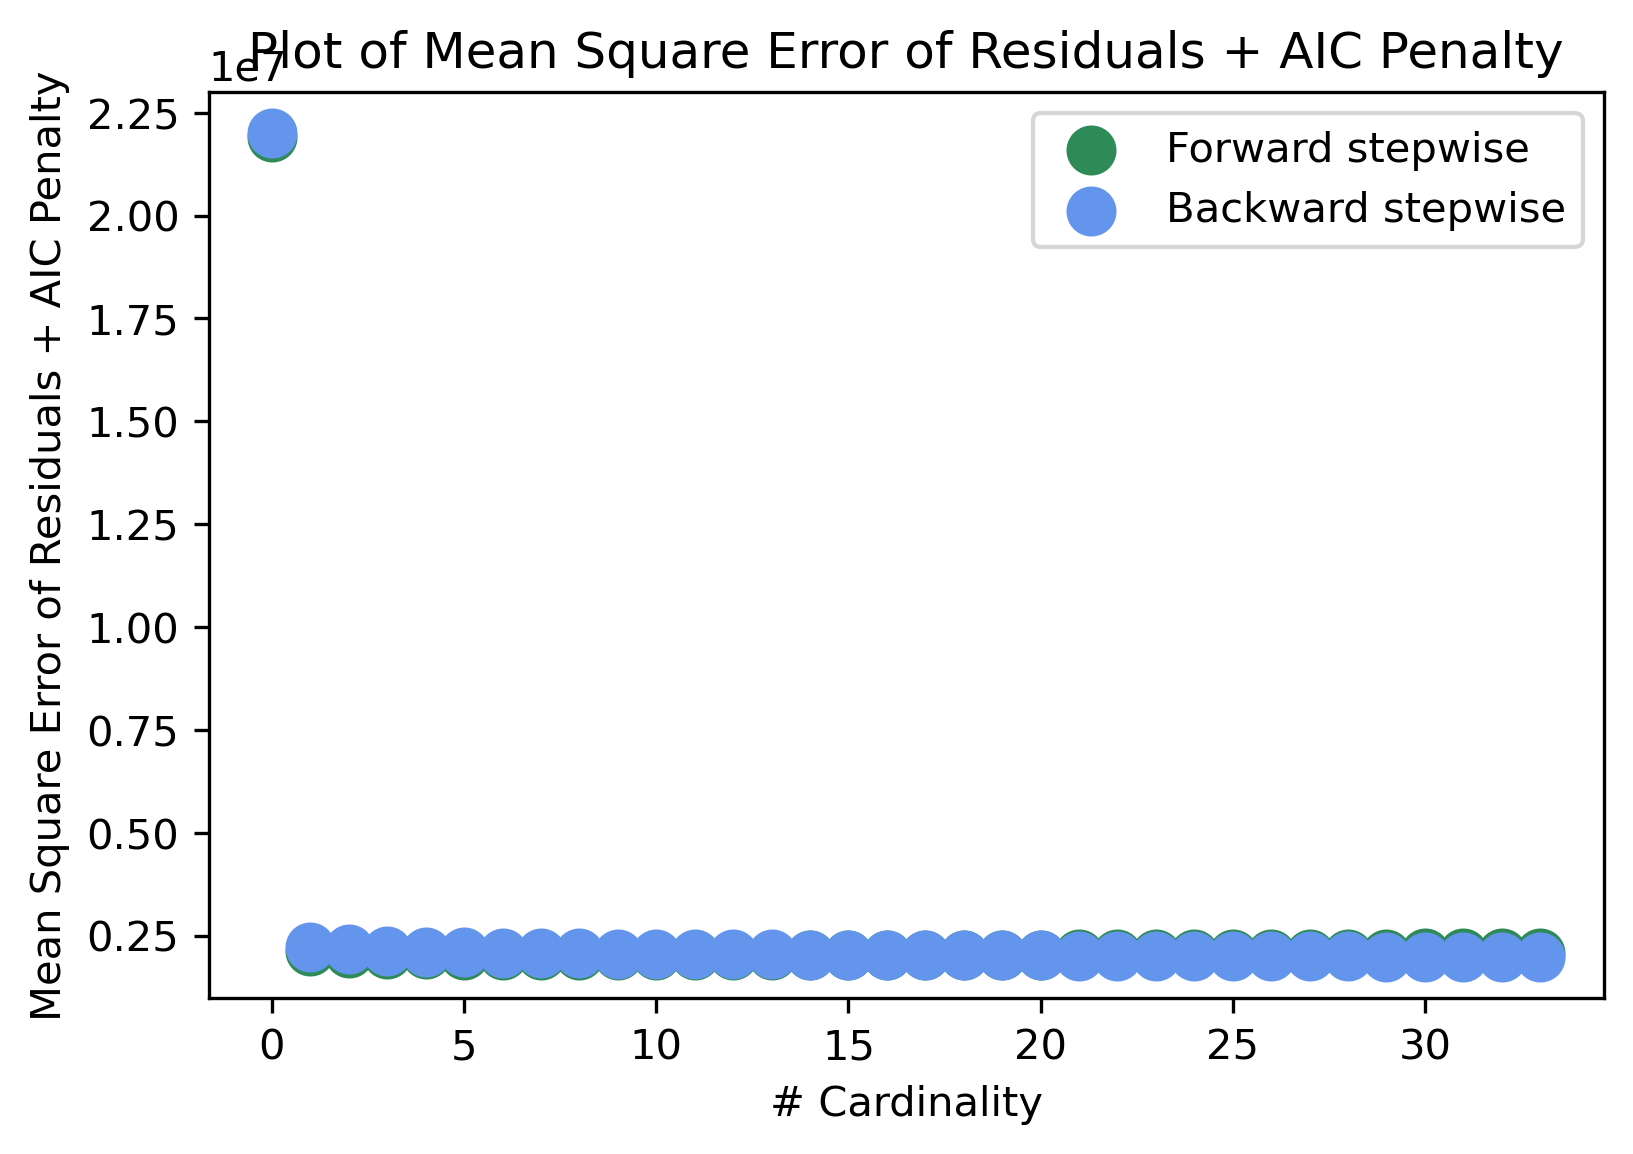

In [89]:

plt.figure()
cardinalities = range(p+1)
#plt.scatter(cardinalities, AIC_vals,color='red',linewidth=6,label='Subset selection')
plt.scatter(cardinalities, AIC_vals_fw,color='seagreen',linewidth=6,label='Forward stepwise')
plt.scatter(cardinalities, r_AIC_vals_bw,color='cornflowerblue',linewidth=6,label='Backward stepwise')
plt.title('Plot of Mean Square Error of Residuals + AIC Penalty')
plt.xlabel("# Cardinality")
plt.ylabel("Mean Square Error of Residuals + AIC Penalty")

#Mark the value of the best MSE
#plt.axvline(trainMSE_vals.index(min(trainMSE_vals)), linestyle='--', color='lightcoral',label=r'best trainMSE')

#Mark the value of the best AIC
#plt.axvline(AIC_vals.index(min(AIC_vals)), linestyle='--', color='palegreen',label=r'best AIC')

#Mark the value of the best BIC
#plt.axvline(BIC_vals.index(min(BIC_vals)), linestyle='--', \
 #         color='lightskyblue',label=r'best BIC')

#plt.ylim(0,50)
plt.legend(loc='upper right')
# plt.xlim(-0.5, p+10)
plt.show()

In [90]:
print("Backward")
for i in range(p+1):
    print("Feature:"+ str(subsets_bw[i]["features"])+", AIC: "+ str(subsets_bw[i]["trainMSE"]) )

print("forward")
for i in range(p+1):
    print("Feature:"+ str(subsets_fw[i]["features"])+", AIC: "+ str(subsets_fw[i]["trainMSE"]) )
print("subset")
for i in range(p+1):
    print("Feature:"+ str(subsets_fw[i]["features"])+", AIC: "+ str(subsets_fw[i]["trainMSE"]) )

Backward
Feature:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], AIC: 1979916.272657512
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], AIC: 1979916.2726575122
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], AIC: 1979916.2726575122
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32], AIC: 1979916.2726575122
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 28, 29, 30, 31, 32], AIC: 1979916.2911743936
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25, 26, 28, 29, 30, 31, 32], AIC: 1979999.430411146
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25, 26, 28, 29, 30, 31, 32], AIC

In [91]:
subsets_fw[33]['testMSE'].min()

2542042.684668859

# Classification ...

In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [93]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [94]:
Y=dataset["Attrition"]

In [95]:
data=dataset[dataset.columns[~dataset.columns.isin(["Attrition"])]]



In [96]:
data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [97]:
#Split up the big data set into a test set (for final evaluation) and a training set
X_train, X_test, y_train, y_test = train_test_split( data,Y, train_size=1400)


# Logistic Regression

In [98]:
lr=LogisticRegression()
model=lr.fit(X_train, y_train)
y_pred=model.predict(X_test)

print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=3))

[[58 12]
 [ 0  0]]
              precision    recall  f1-score   support

          No      0.829     1.000     0.906        58
         Yes      0.000     0.000     0.000        12

    accuracy                          0.829        70
   macro avg      0.414     0.500     0.453        70
weighted avg      0.687     0.829     0.751        70



/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score ar

# Linear Discriminant Analysis

In [99]:
lda=LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=3))

[[55  6]
 [ 3  6]]
              precision    recall  f1-score   support

          No      0.902     0.948     0.924        58
         Yes      0.667     0.500     0.571        12

    accuracy                          0.871        70
   macro avg      0.784     0.724     0.748        70
weighted avg      0.861     0.871     0.864        70



# Quadratic Discriminant Analysis

In [100]:
qda=QuadraticDiscriminantAnalysis()
model = qda.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=3))

[[15  1]
 [43 11]]
              precision    recall  f1-score   support

          No      0.938     0.259     0.405        58
         Yes      0.204     0.917     0.333        12

    accuracy                          0.371        70
   macro avg      0.571     0.588     0.369        70
weighted avg      0.812     0.371     0.393        70



/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# Naive Bayes

In [101]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [102]:
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=3))


[[43  3]
 [15  9]]
              precision    recall  f1-score   support

          No      0.935     0.741     0.827        58
         Yes      0.375     0.750     0.500        12

    accuracy                          0.743        70
   macro avg      0.655     0.746     0.663        70
weighted avg      0.839     0.743     0.771        70



# Support Vector Machine

In [103]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [104]:
y_pred=model.predict(X_test)

In [105]:
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=3))

[[58 12]
 [ 0  0]]
              precision    recall  f1-score   support

          No      0.829     1.000     0.906        58
         Yes      0.000     0.000     0.000        12

    accuracy                          0.829        70
   macro avg      0.414     0.500     0.453        70
weighted avg      0.687     0.829     0.751        70



/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K Nearest Neighbors

In [106]:
knn=KNeighborsClassifier(n_neighbors=20)
model=knn.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [107]:
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=3))

[[58 12]
 [ 0  0]]
              precision    recall  f1-score   support

          No      0.829     1.000     0.906        58
         Yes      0.000     0.000     0.000        12

    accuracy                          0.829        70
   macro avg      0.414     0.500     0.453        70
weighted avg      0.687     0.829     0.751        70



/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [108]:
decisionTree= tree.DecisionTreeClassifier()
model=decisionTree.fit(X_train, y_train)

In [109]:
y_pred=model.predict(X_test)

In [110]:
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=3))

[[54  6]
 [ 4  6]]
              precision    recall  f1-score   support

          No      0.900     0.931     0.915        58
         Yes      0.600     0.500     0.545        12

    accuracy                          0.857        70
   macro avg      0.750     0.716     0.730        70
weighted avg      0.849     0.857     0.852        70



# Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
randomForeset= RandomForestClassifier()
model=randomForeset.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [115]:
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=3))

[[58  9]
 [ 0  3]]
              precision    recall  f1-score   support

          No      0.866     1.000     0.928        58
         Yes      1.000     0.250     0.400        12

    accuracy                          0.871        70
   macro avg      0.933     0.625     0.664        70
weighted avg      0.889     0.871     0.837        70



# XGBoost Classifier

In [116]:
import xgboost as xgb

In [117]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic")
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

[20:23:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [118]:
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=3))

[[55  7]
 [ 3  5]]
              precision    recall  f1-score   support

          No      0.887     0.948     0.917        58
         Yes      0.625     0.417     0.500        12

    accuracy                          0.857        70
   macro avg      0.756     0.682     0.708        70
weighted avg      0.842     0.857     0.845        70

